In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 359.2 gigabytes of available RAM

You are using a high-RAM runtime!


# The Ultimate Fighting Championship (UFC)

The Ultimate Fighting Championship (UFC) is a leading American Mixed Martial Arts (MMA) organization that has played a pivotal role in popularizing the sport since its inception in 1993. The UFC organizes events where fighters compete across various weight classes and has held over 500 events to date. In the UFC, there are 8 weight classes for men and 4 for women, with approximately 50 fighters in each class. These athletes come from diverse combat sports backgrounds and are selected to join the UFC roster based on their skills and achievements. Once signed, UFC matchmakers strategically pair fighters for matchups.

A typical UFC event features up to 12-15 fights, divided into two segments: the undercard and the main card. The undercard generally showcases up-and-coming fighters or those lower in the rankings, typically comprising around 7 fights. The main card highlights mid-ranked and top-tier fighters, usually featuring 5 bouts, culminating in one or two headline matchups. Most UFC fights consist of three 5-minute rounds, while championship and main event fights last for five rounds. A fight can end by decision (if it goes the full duration and judges determine the winner) or by stoppage, which can occur through a knockout (KO), submission (tap out), or when a fighter is no longer able to defend themselves, prompting the referee to intervene.

This project aims to analyze UFC data to identify patterns, evaluate fighter performance, and predict future fight outcomes based on historical fight records and statistics. The analysis will offer insights into how UFC matchups are structured, how fighters are ranked, and which factors contribute to a victory.

# Libraries

1. **pandas**: Used for data manipulation and analysis, providing data structures like DataFrames for handling tabular data.
2. **numpy**: Supports numerical computing in Python, particularly for arrays and matrices, along with a collection of mathematical functions.
3. **matplotlib.pyplot**: A plotting library for creating static, animated, and interactive visualizations in Python.
4. **seaborn**: Built on top of Matplotlib, Seaborn provides a higher-level interface for creating attractive statistical graphics.
5. **datetime**: A module to handle dates and times, providing classes for manipulating dates and times.
6. **pandas.api.types (is_numeric_dtype)**: This function helps to check if a DataFrame column contains numeric data types.
7. **sklearn.model_selection (train_test_split)**: Used for splitting datasets into training and testing sets, an essential step in building machine learning models.
8. **sklearn.metrics (confusion_matrix)**: A function to evaluate the performance of classification models by providing a summary of prediction results.
9. **sklearn.linear_model (LinearRegression)**: Implements linear regression, a basic algorithm for predicting continuous values.
10. **sklearn.ensemble (RandomForestClassifier)**: A machine learning algorithm used for classification tasks, building multiple decision trees and combining them for better accuracy.
11. **statsmodels.api**: Provides classes and functions for the estimation of statistical models and performing statistical tests
12. **geopy (geocoders)**: A library for performing geocoding (transforming addresses into coordinates) and reverse geocoding.
13. **folium**: A Python library for creating interactive maps using the Leaflet.js library.
14. **folium.plugins**: Extends the folium library with additional features like mini-maps, marker clusters, and heat maps.
15. **plotly.express**: A high-level interface for creating interactive plots, supporting a wide range of chart types and customization.



In [3]:
pip install folium

In [4]:
pip install geopy

In [5]:
pip install statsmodels

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier

from geopy.geocoders import *
import folium
from folium import plugins
import plotly.express as px

from PIL import Image
import os
import statistics as st
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Datasets

In [7]:
data = pd.read_csv("/content/drive/MyDrive/Data Mining Project/data.csv")
data.sample(1)

R_fighter        B_fighter         Referee        date  \
1296  Dustin Ortiz  Matheus Nicolau  Keith Peterson  2018-07-28   

                      location Winner  title_bout weight_class  B_avg_KD  \
1296  Calgary, Alberta, Canada    Red       False    Flyweight       2.0   

      B_avg_opp_KD  ...  R_win_by_Decision_Unanimous  R_win_by_KO/TKO  \
1296          0.25  ...                            1                3   

      R_win_by_Submission  R_win_by_TKO_Doctor_Stoppage  R_Stance  \
1296                    0                             0  Orthodox   

      R_Height_cms  R_Reach_cms  R_Weight_lbs  B_age  R_age  
1296         165.1        165.1         125.0   25.0   29.0  

[1 rows x 144 columns]

In [8]:
for col in data :
  print(col)

R_fighter
B_fighter
Referee
date
location
Winner
title_bout
weight_class
B_avg_KD
B_avg_opp_KD
B_avg_SIG_STR_pct
B_avg_opp_SIG_STR_pct
B_avg_TD_pct
B_avg_opp_TD_pct
B_avg_SUB_ATT
B_avg_opp_SUB_ATT
B_avg_REV
B_avg_opp_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_avg_opp_TOTAL_STR_att
B_avg_opp_TOTAL_STR_landed
B_avg_TD_att
B_avg_TD_landed
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_BODY_att
B_avg_BODY_landed
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_LEG_att
B_avg_LEG_landed
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_CTRL_time(seconds)
B_avg_opp_CTRL_time(seconds)
B_total

The dataset utilized in this analysis is based on per-fight averages, making it essential to consider the opponent's historical performance, as fight durations can vary significantly. The dataset comprises numerous columns that track various types of offensive actions, categorized into two main sections: striking and grappling.

The striking section provides average data for metrics such as body shots, clinch strikes, distance strikes, ground strikes, head and leg strikes, knockdowns, and significant strikes.

The grappling section includes data on passes, reversals, submission attempts, and takedowns.

Additionally, a visual representation of select data points is included to enhance the analysis.

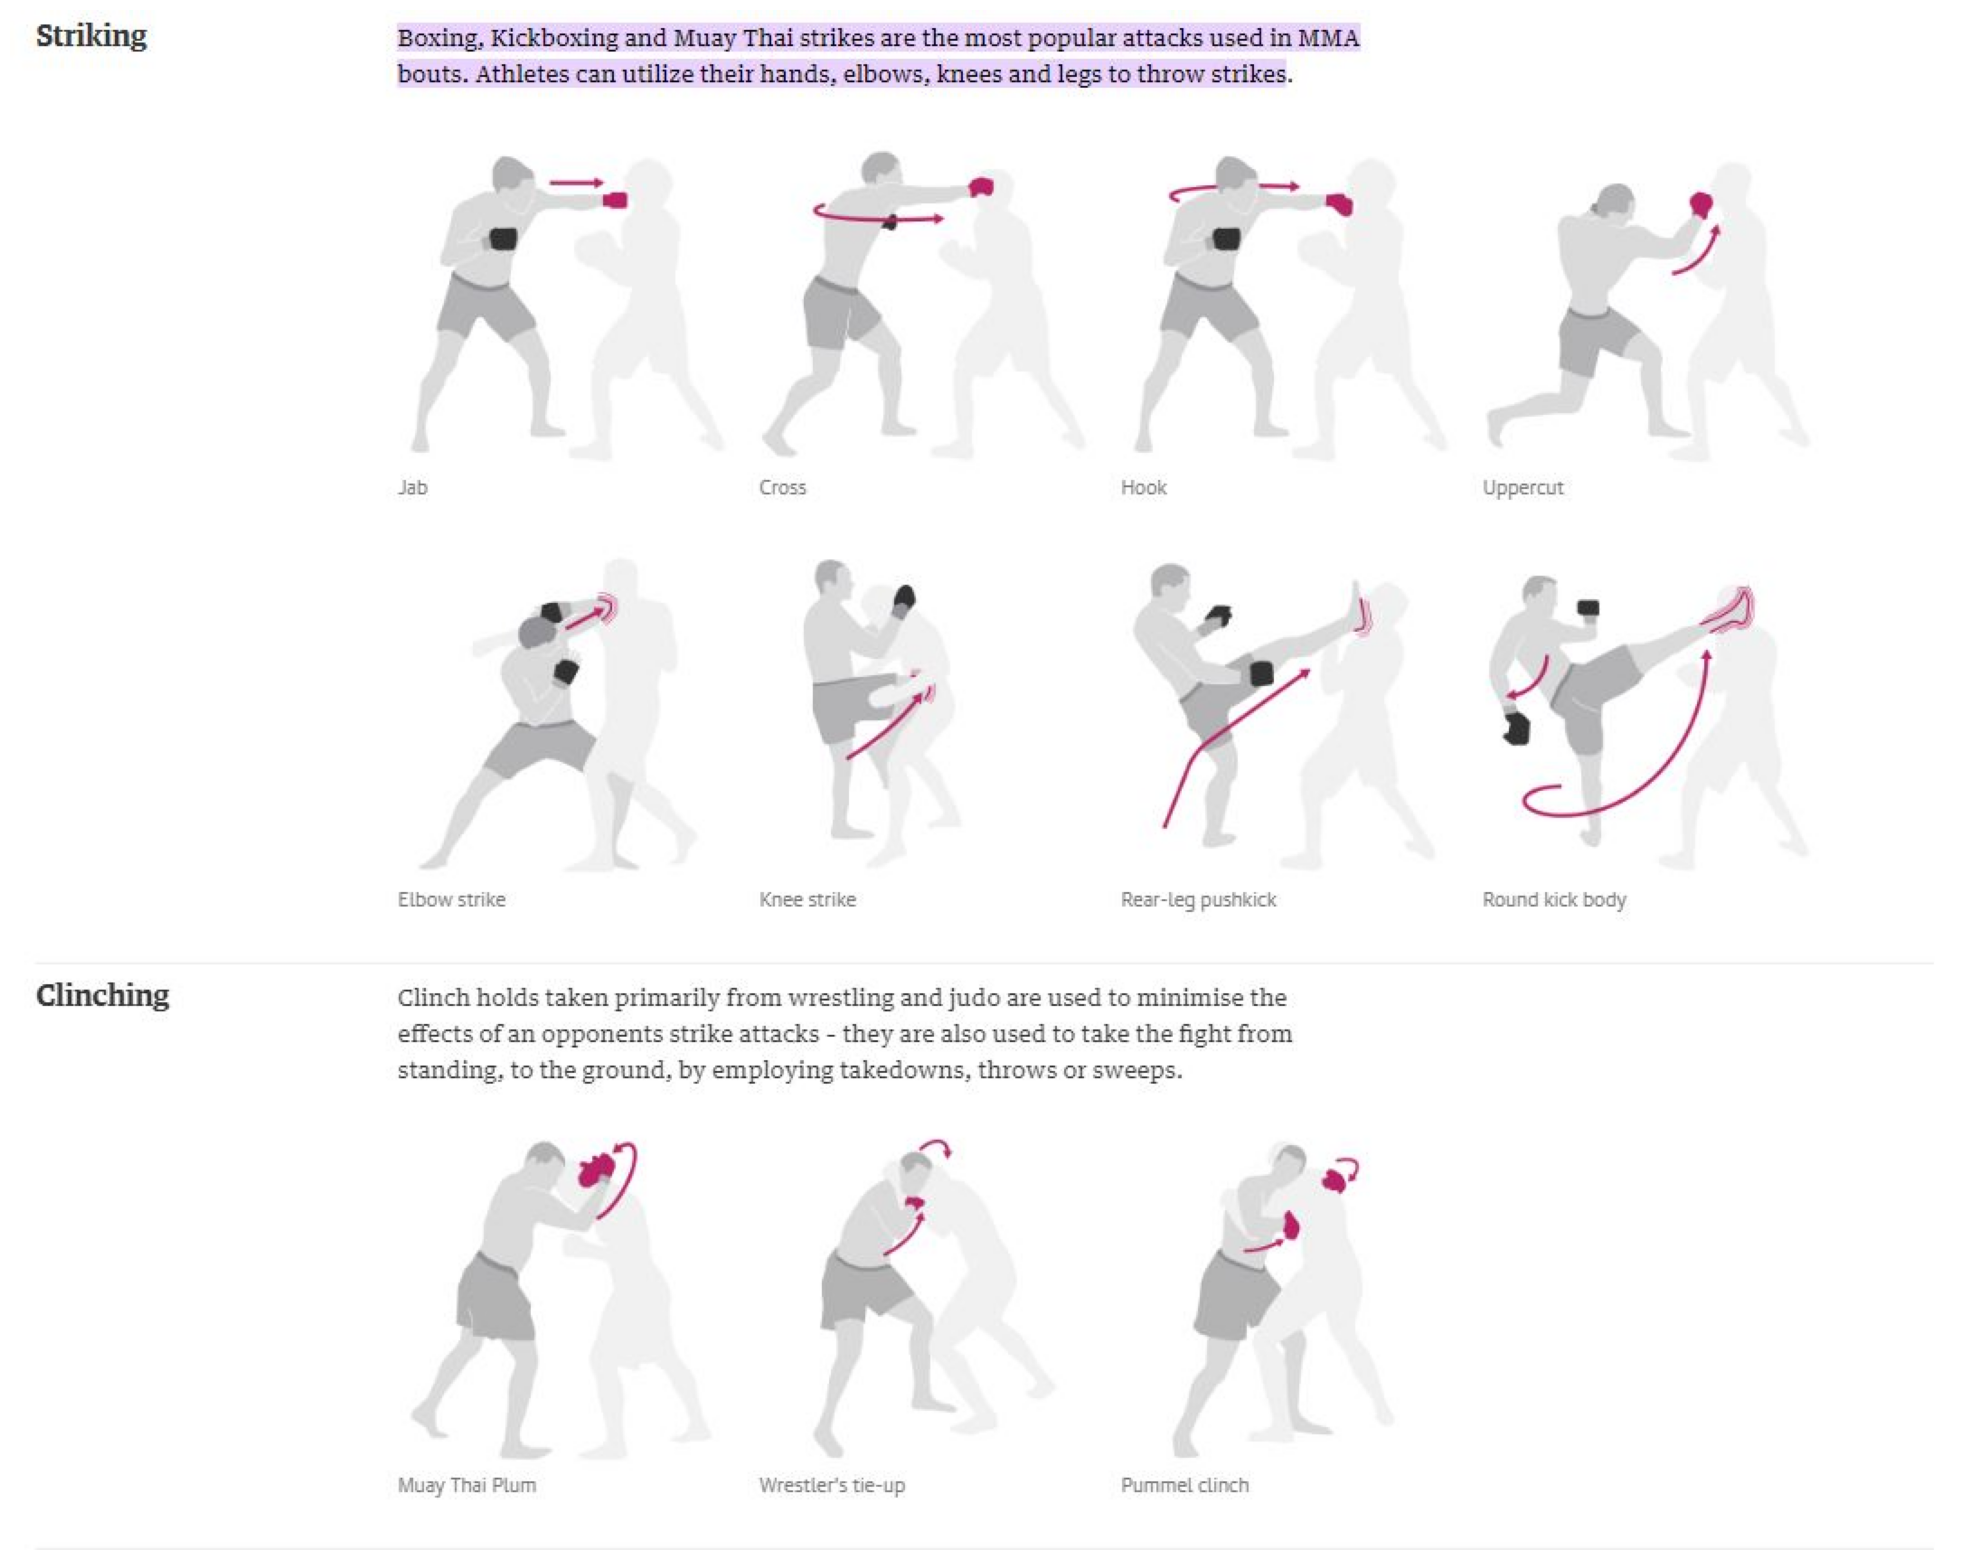

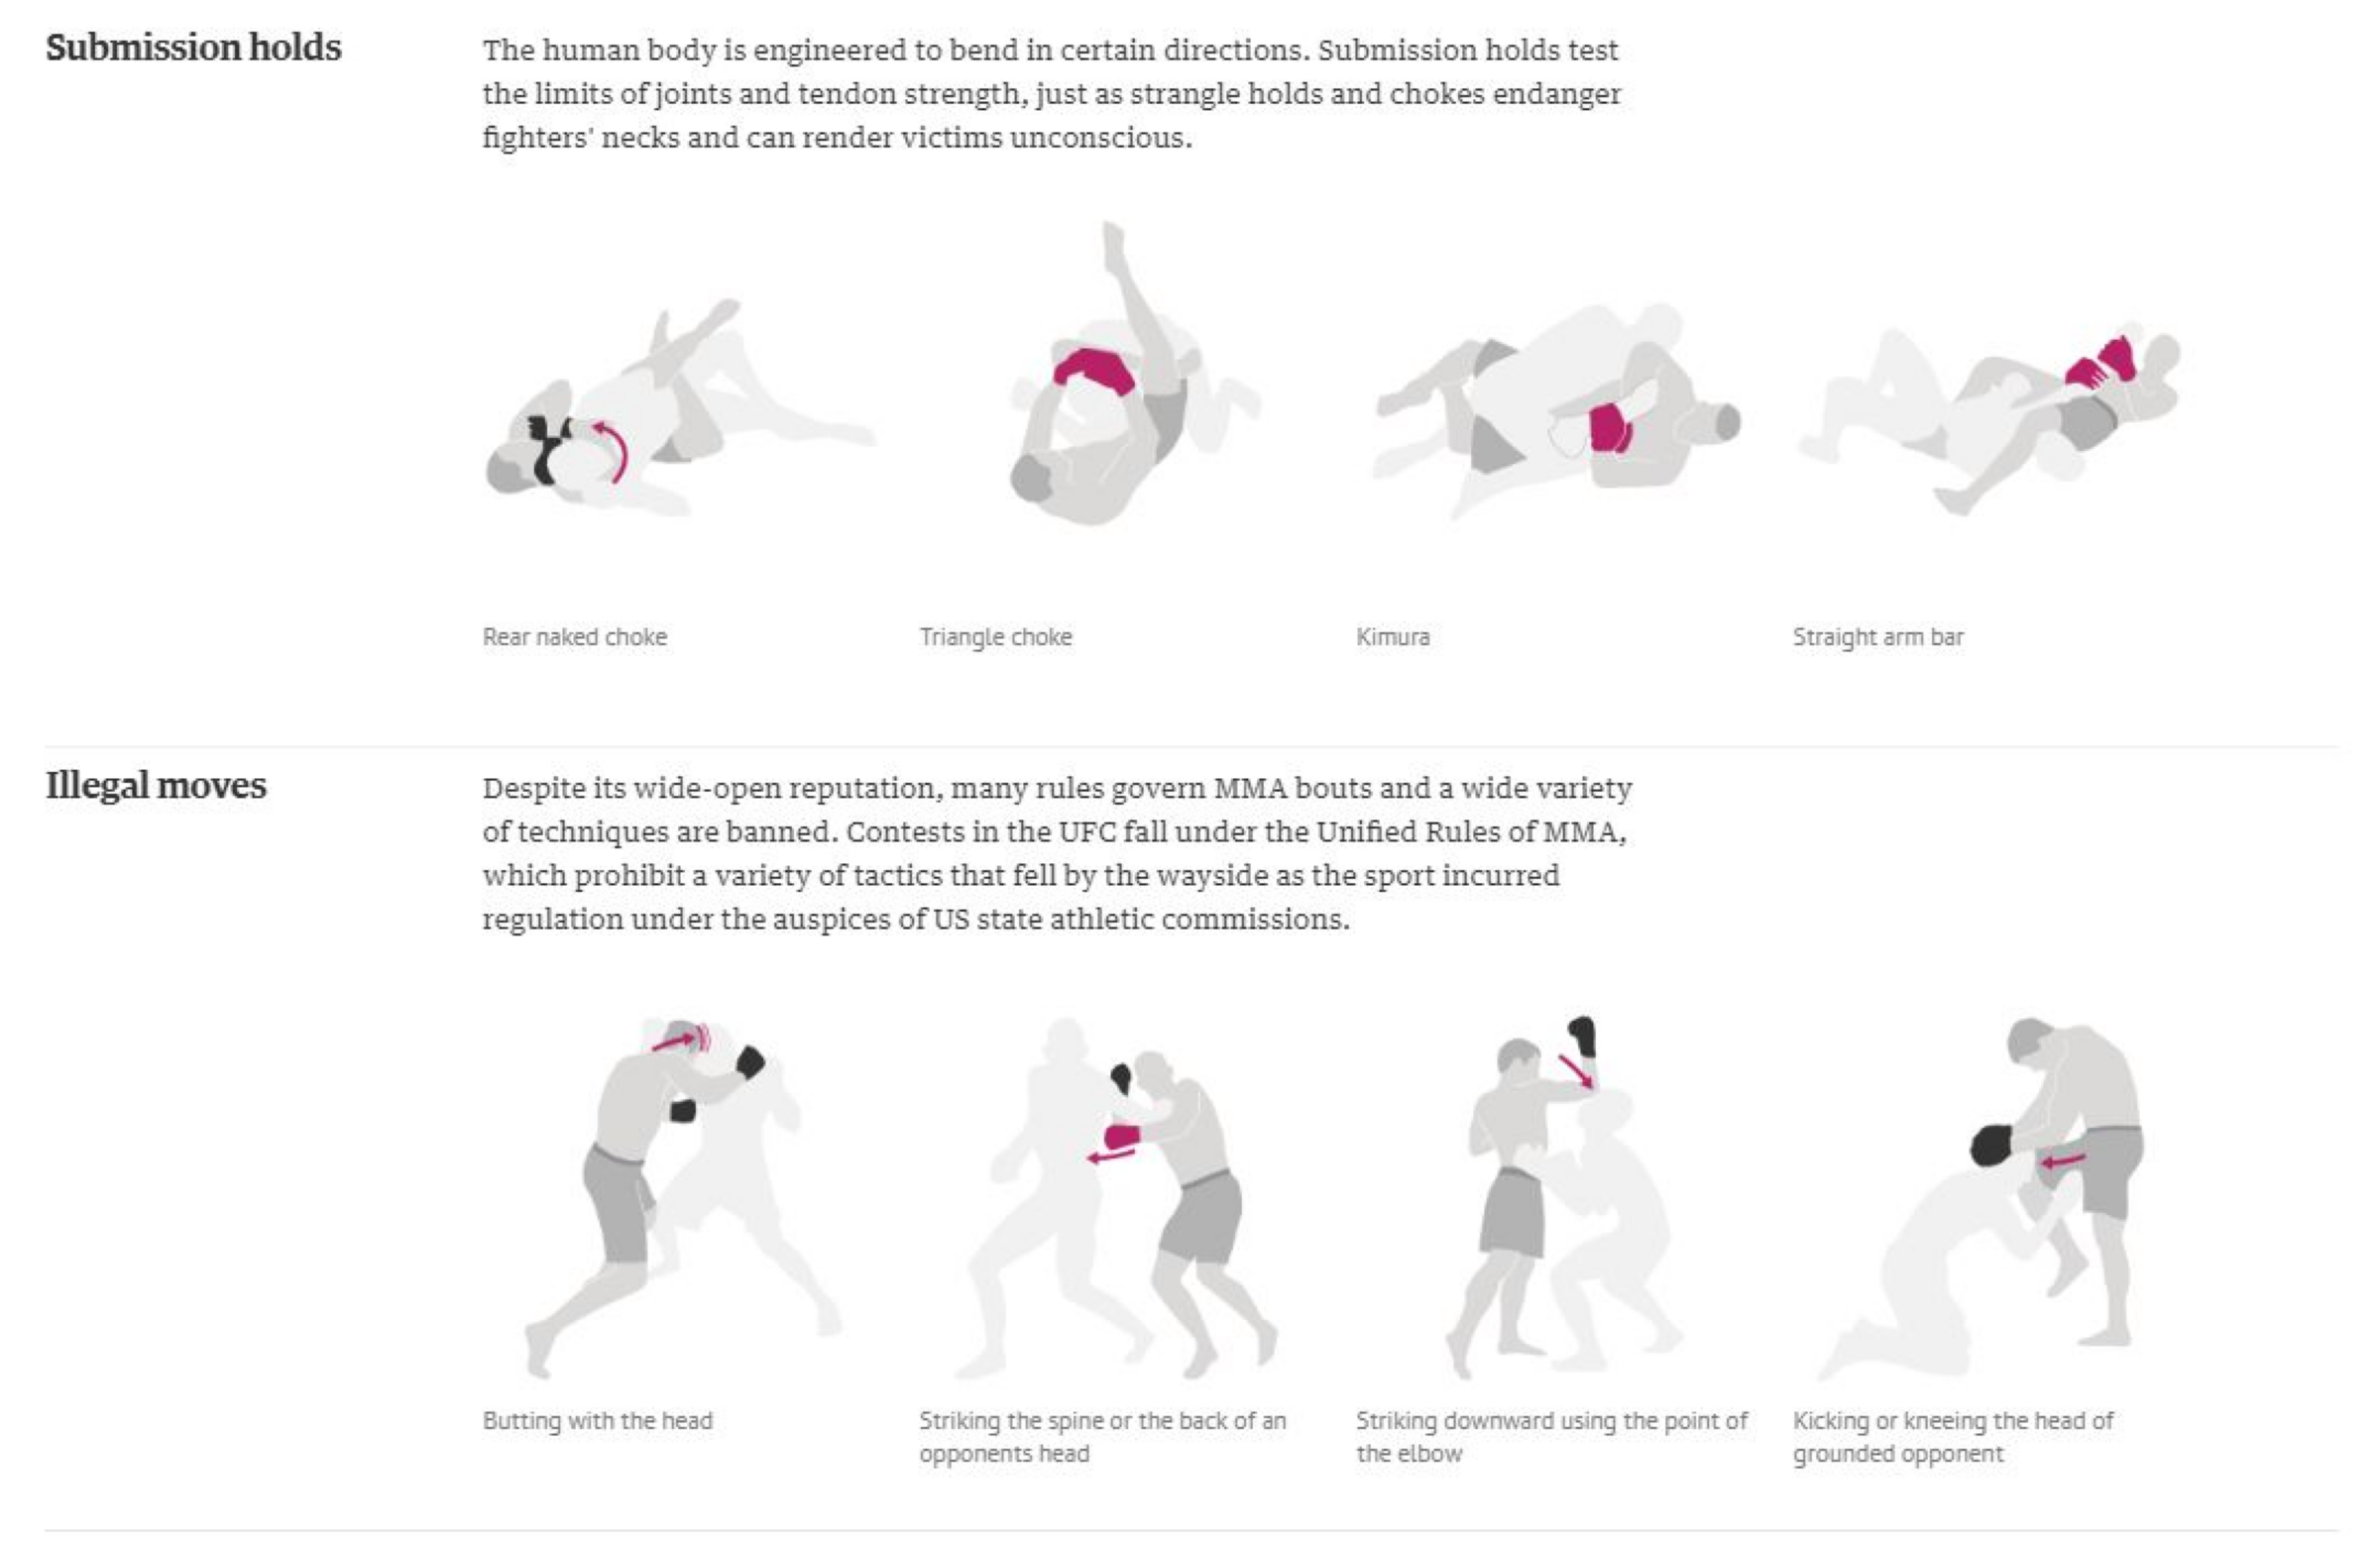

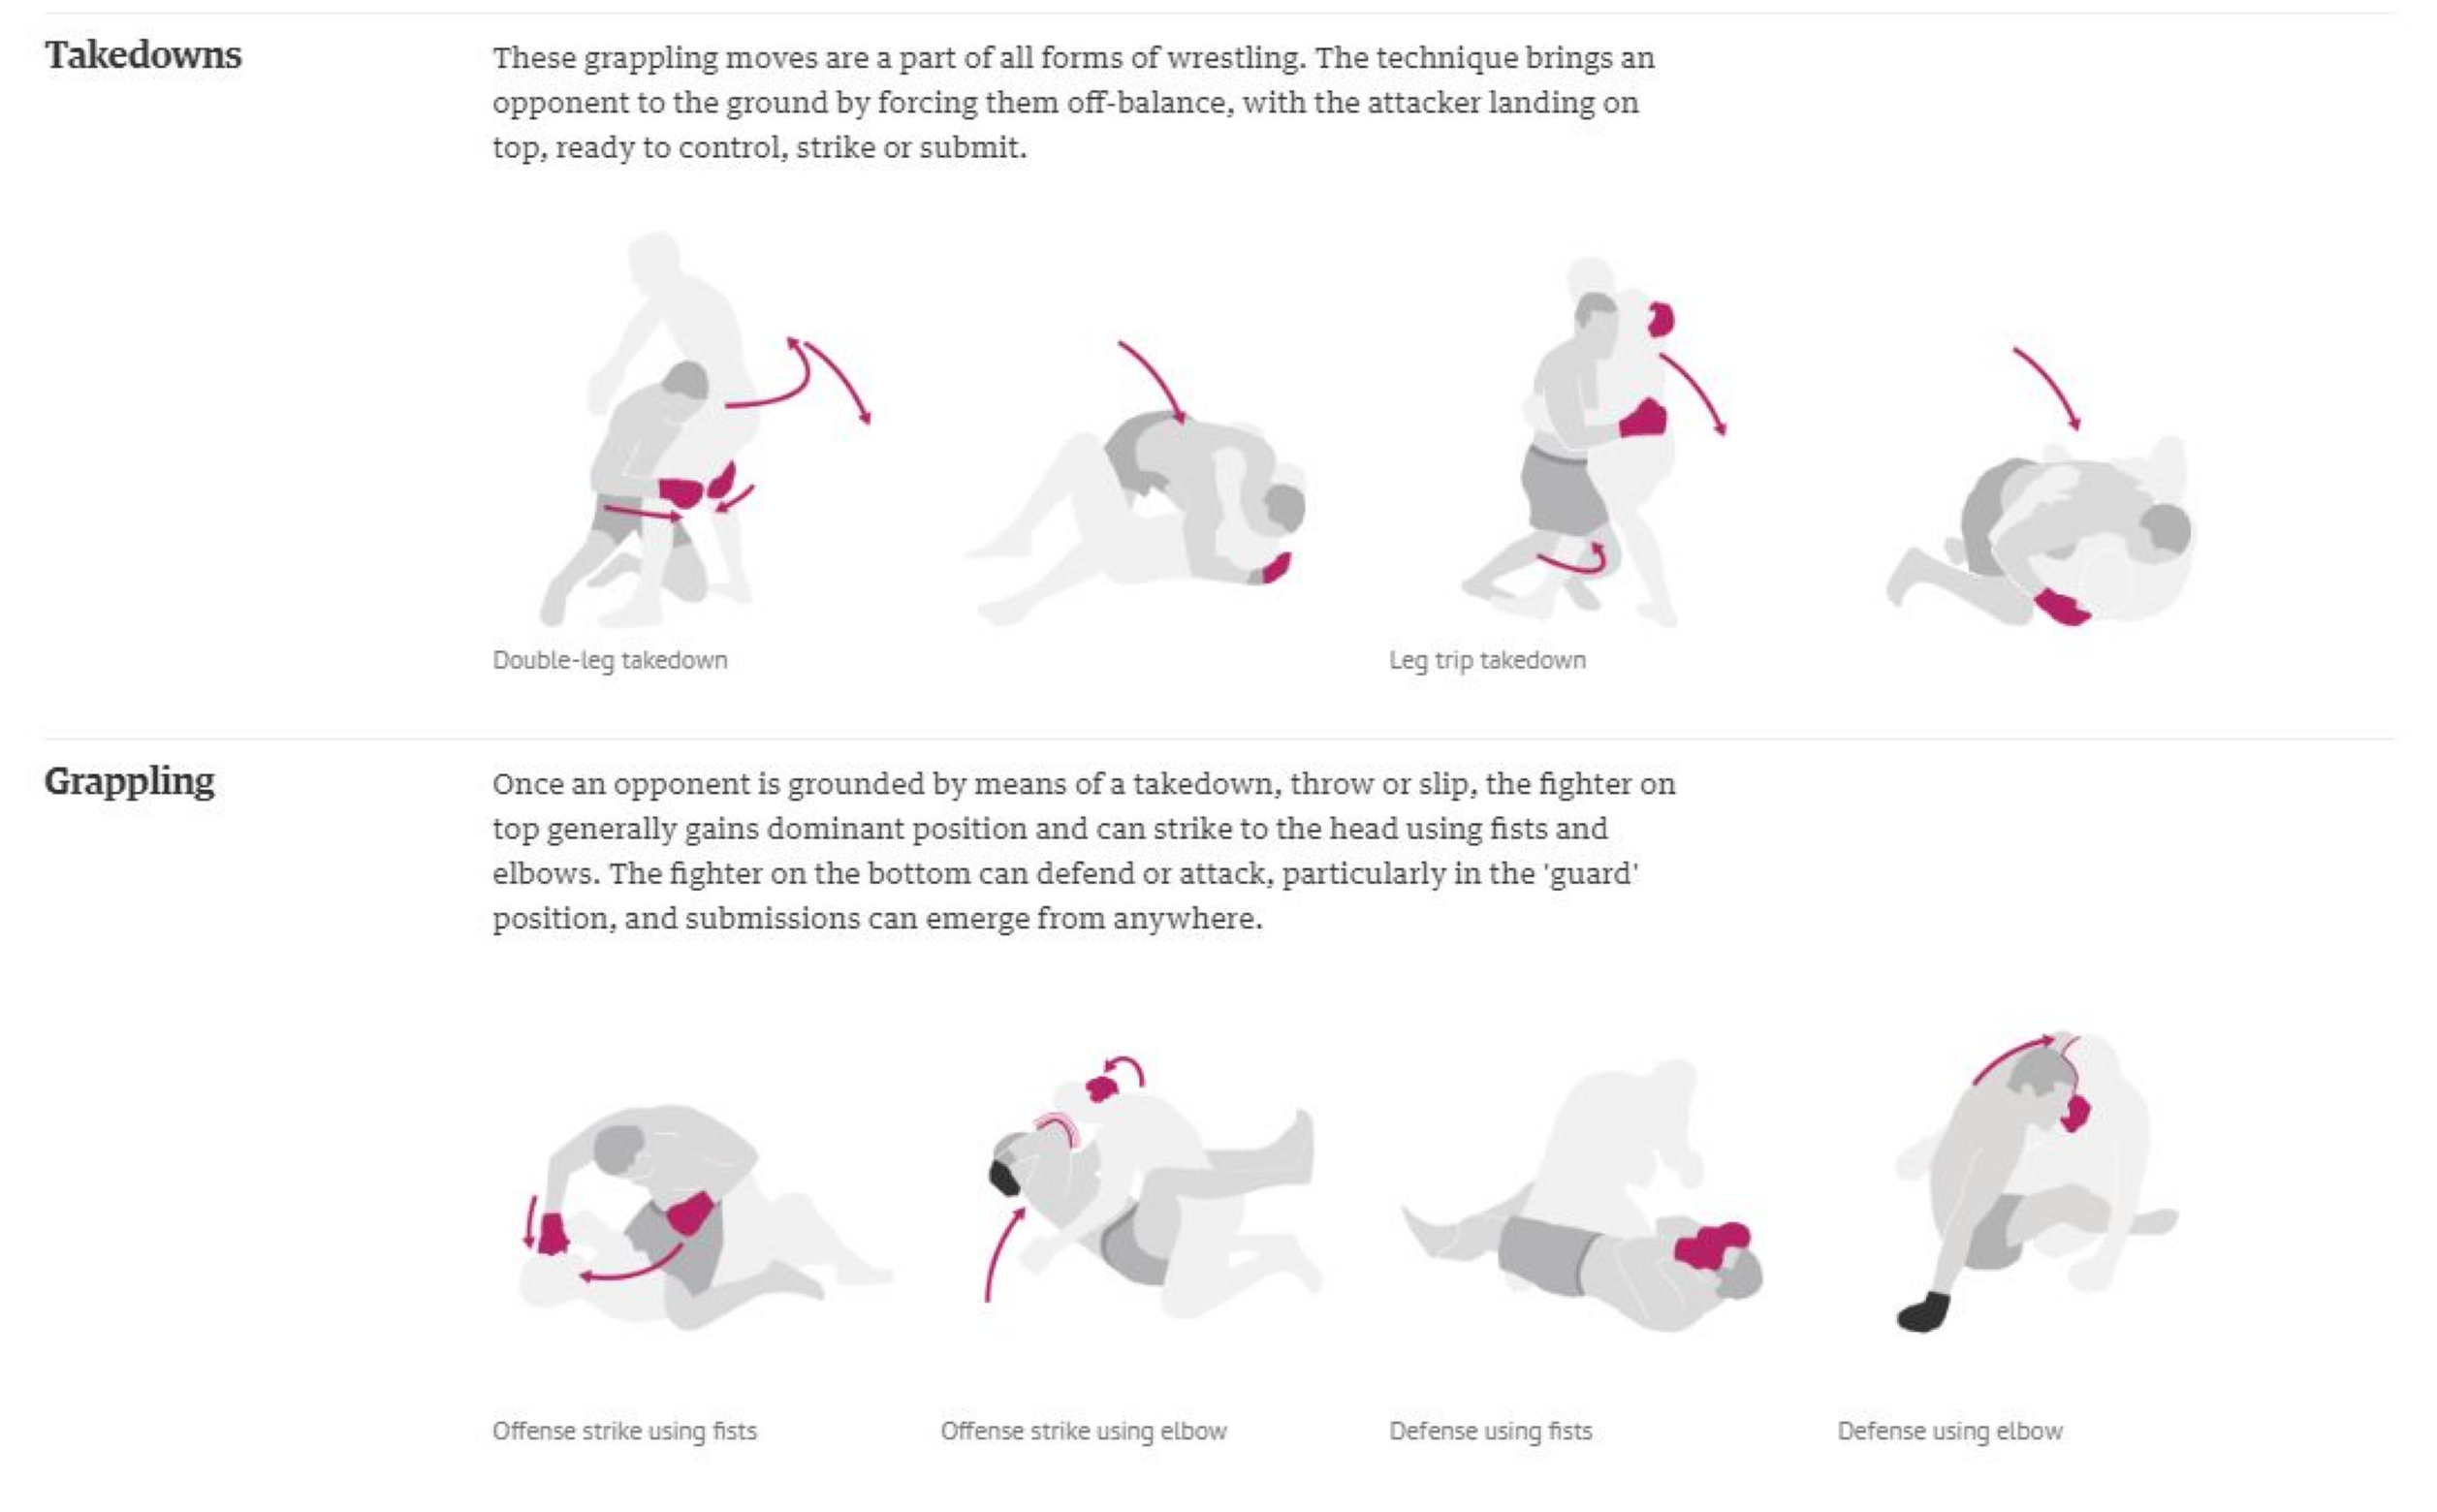

In [9]:
images = os.listdir('/content/drive/MyDrive/Data Mining Project/Images/Fight Styles')
for image in images :
  img = Image.open(f"/content/drive/MyDrive/Data Mining Project/Images/Fight Styles/{image}")
  plt.figure(figsize=(50,20))
  plt.imshow(img)
  plt.axis('off')  # Hide axes
  plt.show()

# Exploratory Data Analysis

In the following section, we will analyze key variables within the dataset to gain insight into the type of information it contains. Furthermore, we will present several graphs illustrating the distributions of selected variables, highlighting trends over time and showing how these variables are categorized across different groups.

In the dataset, fighters are represented by the colors red and blue, indicating their assigned corners. Typically, the red corner is assigned to the more notable fighter, although this does not imply they are favored to win. It is common practice for the fighter in the blue corner to walk out first in non-title fights, while in title bouts, the reigning champion is assigned to the red corner and walks out second.

Each row in the dataset compiles statistics for both fighters up to the current fight, with the columns representing average compiled stats from all their previous bouts. The dataset includes logistical information about the fight and specific statistics for each fighter. Attributes related to the red corner fighter are prefixed with 'R', while those related to the blue corner fighter are prefixed with 'B'. Additionally, the prefix 'opp_' denotes actions taken by the opponent against the fighter. The target variable in this dataset is 'Winner', which indicates the outcome of the fight.

### Title Bout

In [10]:
# Win rates of title and non-title fights based on color
title_fights     = data[data['title_bout'] == True]
non_title_fights = data[data['title_bout'] == False]

print('The number of title fights     : ', title_fights.shape[0])
print('The number of non-title fights : ', non_title_fights.shape[0])

print('Probability red fighter wins in title fight        : ', title_fights[title_fights['Winner'] == 'Red'].shape[0]/title_fights.shape[0])
print('Probability red fighter wins in a non-title fight  : ', non_title_fights[non_title_fights['Winner'] == 'Red'].shape[0]/non_title_fights.shape[0])

The number of title fights     :  365
The number of non-title fights :  5647
Probability red fighter wins in title fight        :  0.7972602739726027
Probability red fighter wins in a non-title fight  :  0.653090136355587


<ipython-input-11-94ae8386a96d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Winner', data=data, palette=['red', 'blue','green'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

<Axes: xlabel='Winner', ylabel='count'>

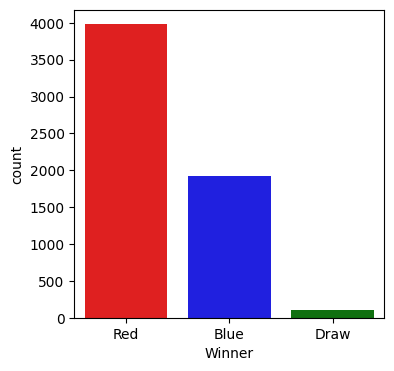

In [11]:
# Graph the instances of each winning corner
plt.figure(figsize=(4,4))
sns.countplot(x='Winner', data=data, palette=['red', 'blue','green'])

### Weight Classes

The following bar graph illustrates the distribution of fighters across different weight classes based on their appearances in the dataset. It is important to note that this analysis counts each occurrence of a fighter in a particular weight class without differentiating by individual fighter. For instance, if two fighters of the same weight class compete in five matches, their weight class will be represented ten times in the graph. This approach provides insight into the frequency of weight class representation rather than simply indicating which weight classes have the most fighters.

As depicted in the graph, the majority of recorded fights occur in the Lightweight and Welterweight divisions, followed by the Middleweight division. This suggests that these weight classes are the most frequently featured in the dataset.

<ipython-input-12-7fbd0755f445>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['weight_class'], data=data,palette='Set2');
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

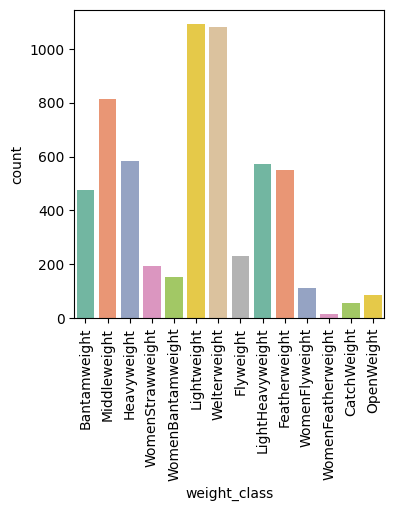

In [12]:
# Count the number of instances of each weight class
plt.figure(figsize=(4,4))
plt.xticks(rotation=90)
sns.countplot(x=data['weight_class'], data=data,palette='Set2');

### Ages

The following section presents an analysis of the fighters' ages. This examination takes into account every occurrence of a specific age within the dataset, without differentiating between individual fighters. The distribution of ages follows a relatively normal curve, with a mean of 29.3 years and a standard deviation of 4.1 years.

<ipython-input-13-2ec677a46820>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=total,palette='Set2');
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will n

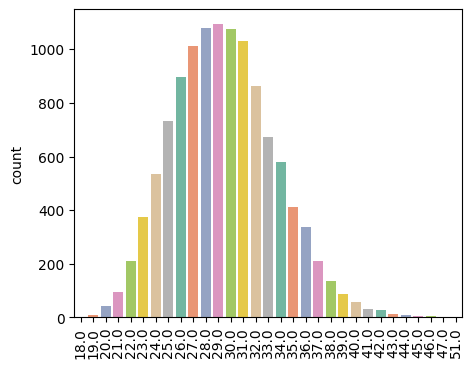

In [13]:
data_ = data.dropna(subset=['B_age'])
data_ = data_.dropna(subset=['R_age'])
all_ages_list = list(np.concatenate((data_['R_age'].values,data_['B_age'].values)))
all_ages_list.sort()

# Construct an array of every age that appears in the dataset
total = [str(age) for age in all_ages_list]

# Graph the distribution of ages
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
sns.countplot(x=total,palette='Set2');

To examine whether age influences the likelihood of winning a fight, we analyzed the distribution of winners’ ages compared to the distribution of all fighters' ages within the UFC dataset. If age provided a significant advantage, we would expect a noticeable difference between these distributions.

The plot below displays Kernel Density Estimate (KDE) curves for the ages of fight winners and the ages of all fighters. Upon reviewing the KDE plot, we observe that the distributions are quite similar, suggesting that age does not play a substantial role in determining the outcome of a fight.

However, the distribution of winners shows a slightly higher peak around the mean age of 29.11, compared to the mean age of all fighters at 29.47. This indicates that winners tend to be more closely grouped around a younger age. While this slight difference suggests a possible trend, it is relatively minor, making it difficult to definitively conclude that age is a critical factor in predicting fight outcomes.

Mean age of winners      : 29.113804366511946
Mean age of all fighters : 29.465875881038336


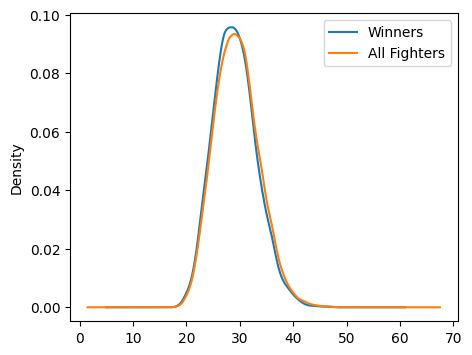

In [14]:
total = [float(i) for i in total]
# Create a column entry of only the winners' ages
data_['Winner_age'] = [b_age if winner == 'Blue' else r_age
                        for winner, b_age, r_age in
                        zip(data_['Winner'], data_['B_age'], data_['R_age'])]

# Plot the distribution of winners and the distribution of every fighter
plt.figure(figsize=(5,4))
ax = data_['Winner_age'].plot.kde();
pd.Series(total).plot.kde(ax=ax);
ax.legend(["Winners", "All Fighters"]);

print(f'Mean age of winners      : {st.mean(data_.Winner_age)}')
print(f'Mean age of all fighters : {st.mean(all_ages_list)}')

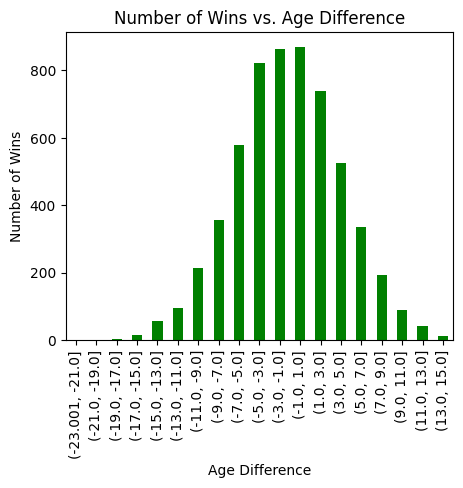

In [15]:
# Initialize an empty list to store age differences
age_diff = []

# Iterate through the rows of the DataFrame
for row_index, row in data_.iterrows():
    a = row['R_age'] - row['B_age']  # Calculate age difference

    # If the winner is 'Blue', reverse the difference
    if row['Winner'] == 'Blue':
        a = row['B_age'] - row['R_age']

    # Append the calculated difference to the list
    age_diff.append(a)

# Convert the list to a pandas Series
age_diff_series = pd.Series(age_diff)

# Categorize the age differences into bins
out = pd.cut(age_diff_series, bins=list(range(-23, 17, 2)), include_lowest=True)

# Plot the distribution
ax = out.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(5,4))
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.xlabel('Age Difference')
plt.ylabel('Number of Wins')
plt.title('Number of Wins vs. Age Difference')
plt.show()

### Stance

<ipython-input-16-2e7dc8424c30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=total,palette='Set2');
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will ne

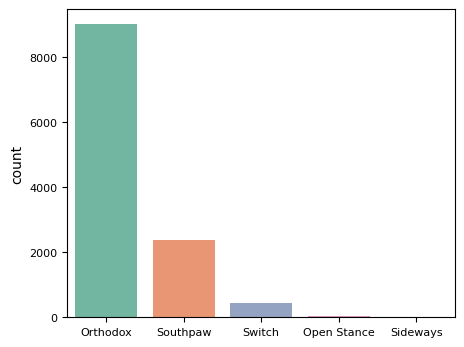

In [16]:
data_ = data.dropna(subset=['R_Stance'])
data_ = data_.dropna(subset=['B_Stance'])
# Count the number of instances of each stance in the dataset and graph them
total = np.concatenate((data_['R_Stance'].values, data_['B_Stance'].values))
plt.figure(figsize=(5,4))
sns.countplot(x=total,palette='Set2');

A similar analysis was conducted on the "Stance" variable to assess the distribution of fighting stances among UFC athletes. Understanding the prevalence of each stance can provide valuable insights into tactical preferences across the fighter population.

The bar graph below presents the frequency of each stance. The "Orthodox" stance is the most prevalent, significantly outnumbering other stances. It is followed by the "Southpaw" stance, with the "Switch" stance being the third most common. This distribution underscores the dominance of the Orthodox stance in the dataset, with Southpaw and Switch stances representing smaller, though notable, portions of the population.

To assess whether certain stances provide a competitive advantage over others, we constructed a simplified dataset that captures the winning and losing stance for each fight. This will enable us to identify any patterns or trends that suggest specific stances are more likely to outperform others.



In [17]:
# Create a table columns that display which stance won and which stance lost for each fight
stance = data_[['Winner', 'B_Stance', 'R_Stance']].copy()
stance['Win_Stance'] = [b_stance if winner == 'Blue' else r_stance
                        for winner, b_stance, r_stance in
                        zip(stance['Winner'], stance['B_Stance'], stance['R_Stance'])]
stance['Lose_Stance'] = [b_stance if winner == 'Red' else r_stance
                         for winner, b_stance, r_stance in
                         zip(stance['Winner'], stance['B_Stance'], stance['R_Stance'])]

# Only keep observations where the two fighters' stances were different
stance = stance[stance['Win_Stance'] != stance['Lose_Stance']].dropna()[['Win_Stance', 'Lose_Stance']]

stance.head()

Win_Stance Lose_Stance
2   Southpaw    Orthodox
3   Southpaw      Switch
5     Switch    Orthodox
7   Southpaw    Orthodox
8   Southpaw    Orthodox

We calculated the pairwise winning percentages for each combination of stances to determine if any stance holds a competitive advantage. To ensure meaningful analysis, we excluded fights where both fighters had the same stance, as these do not provide insight into stance matchups. Additionally, stances with fewer than 40 wins were omitted to avoid drawing conclusions from insufficient data.

The results, presented below, indicate that the "Southpaw" stance exhibits a slight advantage over the "Orthodox" stance, while the "Switch" stance shows a similar edge over "Southpaw." However, it is important to note that these differences are within the margin of error and may be statistical noise. Additional data will be necessary to draw stronger conclusions.



In [18]:
# Iterate through each combination of stances
for win_stance in stance['Win_Stance'].unique():
    for lose_stance in stance['Lose_Stance'].unique():

        # Only examine observations where the stances are different
        if win_stance != lose_stance:
            # Calculate the wins and losses for each pair of stances
            w = len(stance[(stance['Win_Stance'] == win_stance) & (stance['Lose_Stance'] == lose_stance)].index)
            l = len(stance[(stance['Win_Stance'] == lose_stance) & (stance['Lose_Stance'] == win_stance)].index)

            # Only look at stances that have won more than 40 times, since otherwise don't have enough evidence
            if w < 30:
                break
            print(win_stance + " beat " + lose_stance + " in " + str(round(w/(w+l),2)) + "% of matches")

Southpaw beat Orthodox in 0.53% of matches
Southpaw beat Switch in 0.5% of matches
Switch beat Orthodox in 0.53% of matches
Switch beat Southpaw in 0.5% of matches
Orthodox beat Switch in 0.47% of matches
Orthodox beat Southpaw in 0.47% of matches


### Matches per Year

To analyze how the number of UFC matches has evolved over time, we first converted the dataset’s "date" variable into datetime objects, allowing us to easily extract the year of each fight. The resulting plot, shown below, illustrates the change in the number of fights per year.

From the data, it is evident that the number of fights began to rise sharply around 2005, reflecting likely growth in public interest in the UFC. This upward trend continued until 2014, after which the number of fights leveled off, indicating a possible stabilization in UFC activity.

<ipython-input-19-8687dad65c8f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['year'], data=data,palette='Set2');
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list

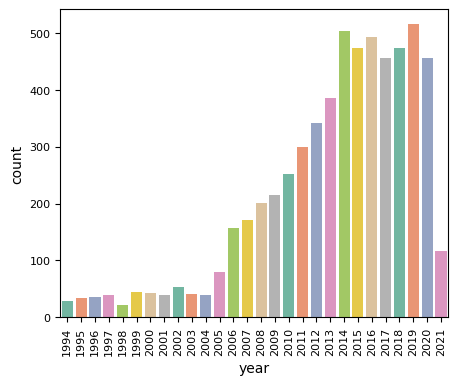

In [19]:
# Convert data to datetime objects and extract year information
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

# Graph number of matches per year
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
sns.countplot(x=data['year'], data=data,palette='Set2');

# Correlations

Another important aspect to consider in the dataset is whether any of the variables are strongly correlated with one another. Identifying these correlations can not only provide valuable insights into the data, but also highlight potential issues to address when building statistical models.

From the list of calculated correlations (and the corresponding heatmap), several variables exhibit extremely high correlations. Many of these are pairs of variables related to _att (attempted) and _landed actions. For instance, the dataset may include both the number of strikes a fighter attempted and how many were successfully landed. It is logical that these variables are correlated; a fighter who attempts a high number of leg strikes will likely land a proportionally higher number of them as well.

Despite this, we are not inclined to drop either of these columns, as their combination can provide additional insights. For example, some fighters may attempt numerous head strikes but land relatively few, which could indicate lower accuracy or a tendency to strike without precision.

The remaining closely correlated variables typically involve significant strikes, labeled as SIG_STR_att (attempted significant strikes) and SIG_STR_landed (landed significant strikes). These correlations are also expected, given that they reflect overall significant striking activity within the dataset.

R_avg_opp_LEG_landed     R_avg_opp_LEG_landed      1.000000
R_avg_LEG_landed         R_avg_LEG_att             0.979509
R_avg_HEAD_att           R_avg_SIG_STR_att         0.977537
R_avg_opp_LEG_att        R_avg_opp_LEG_landed      0.973853
R_avg_opp_SIG_STR_att    R_avg_opp_DISTANCE_att    0.973319
R_avg_CLINCH_landed      R_avg_CLINCH_att          0.970420
B_avg_opp_SIG_STR_att    B_avg_opp_DISTANCE_att    0.969941
B_avg_opp_CLINCH_landed  B_avg_opp_CLINCH_att      0.968020
B_avg_CLINCH_landed      B_avg_CLINCH_att          0.968020
R_avg_GROUND_landed      R_avg_GROUND_att          0.966392
dtype: float64


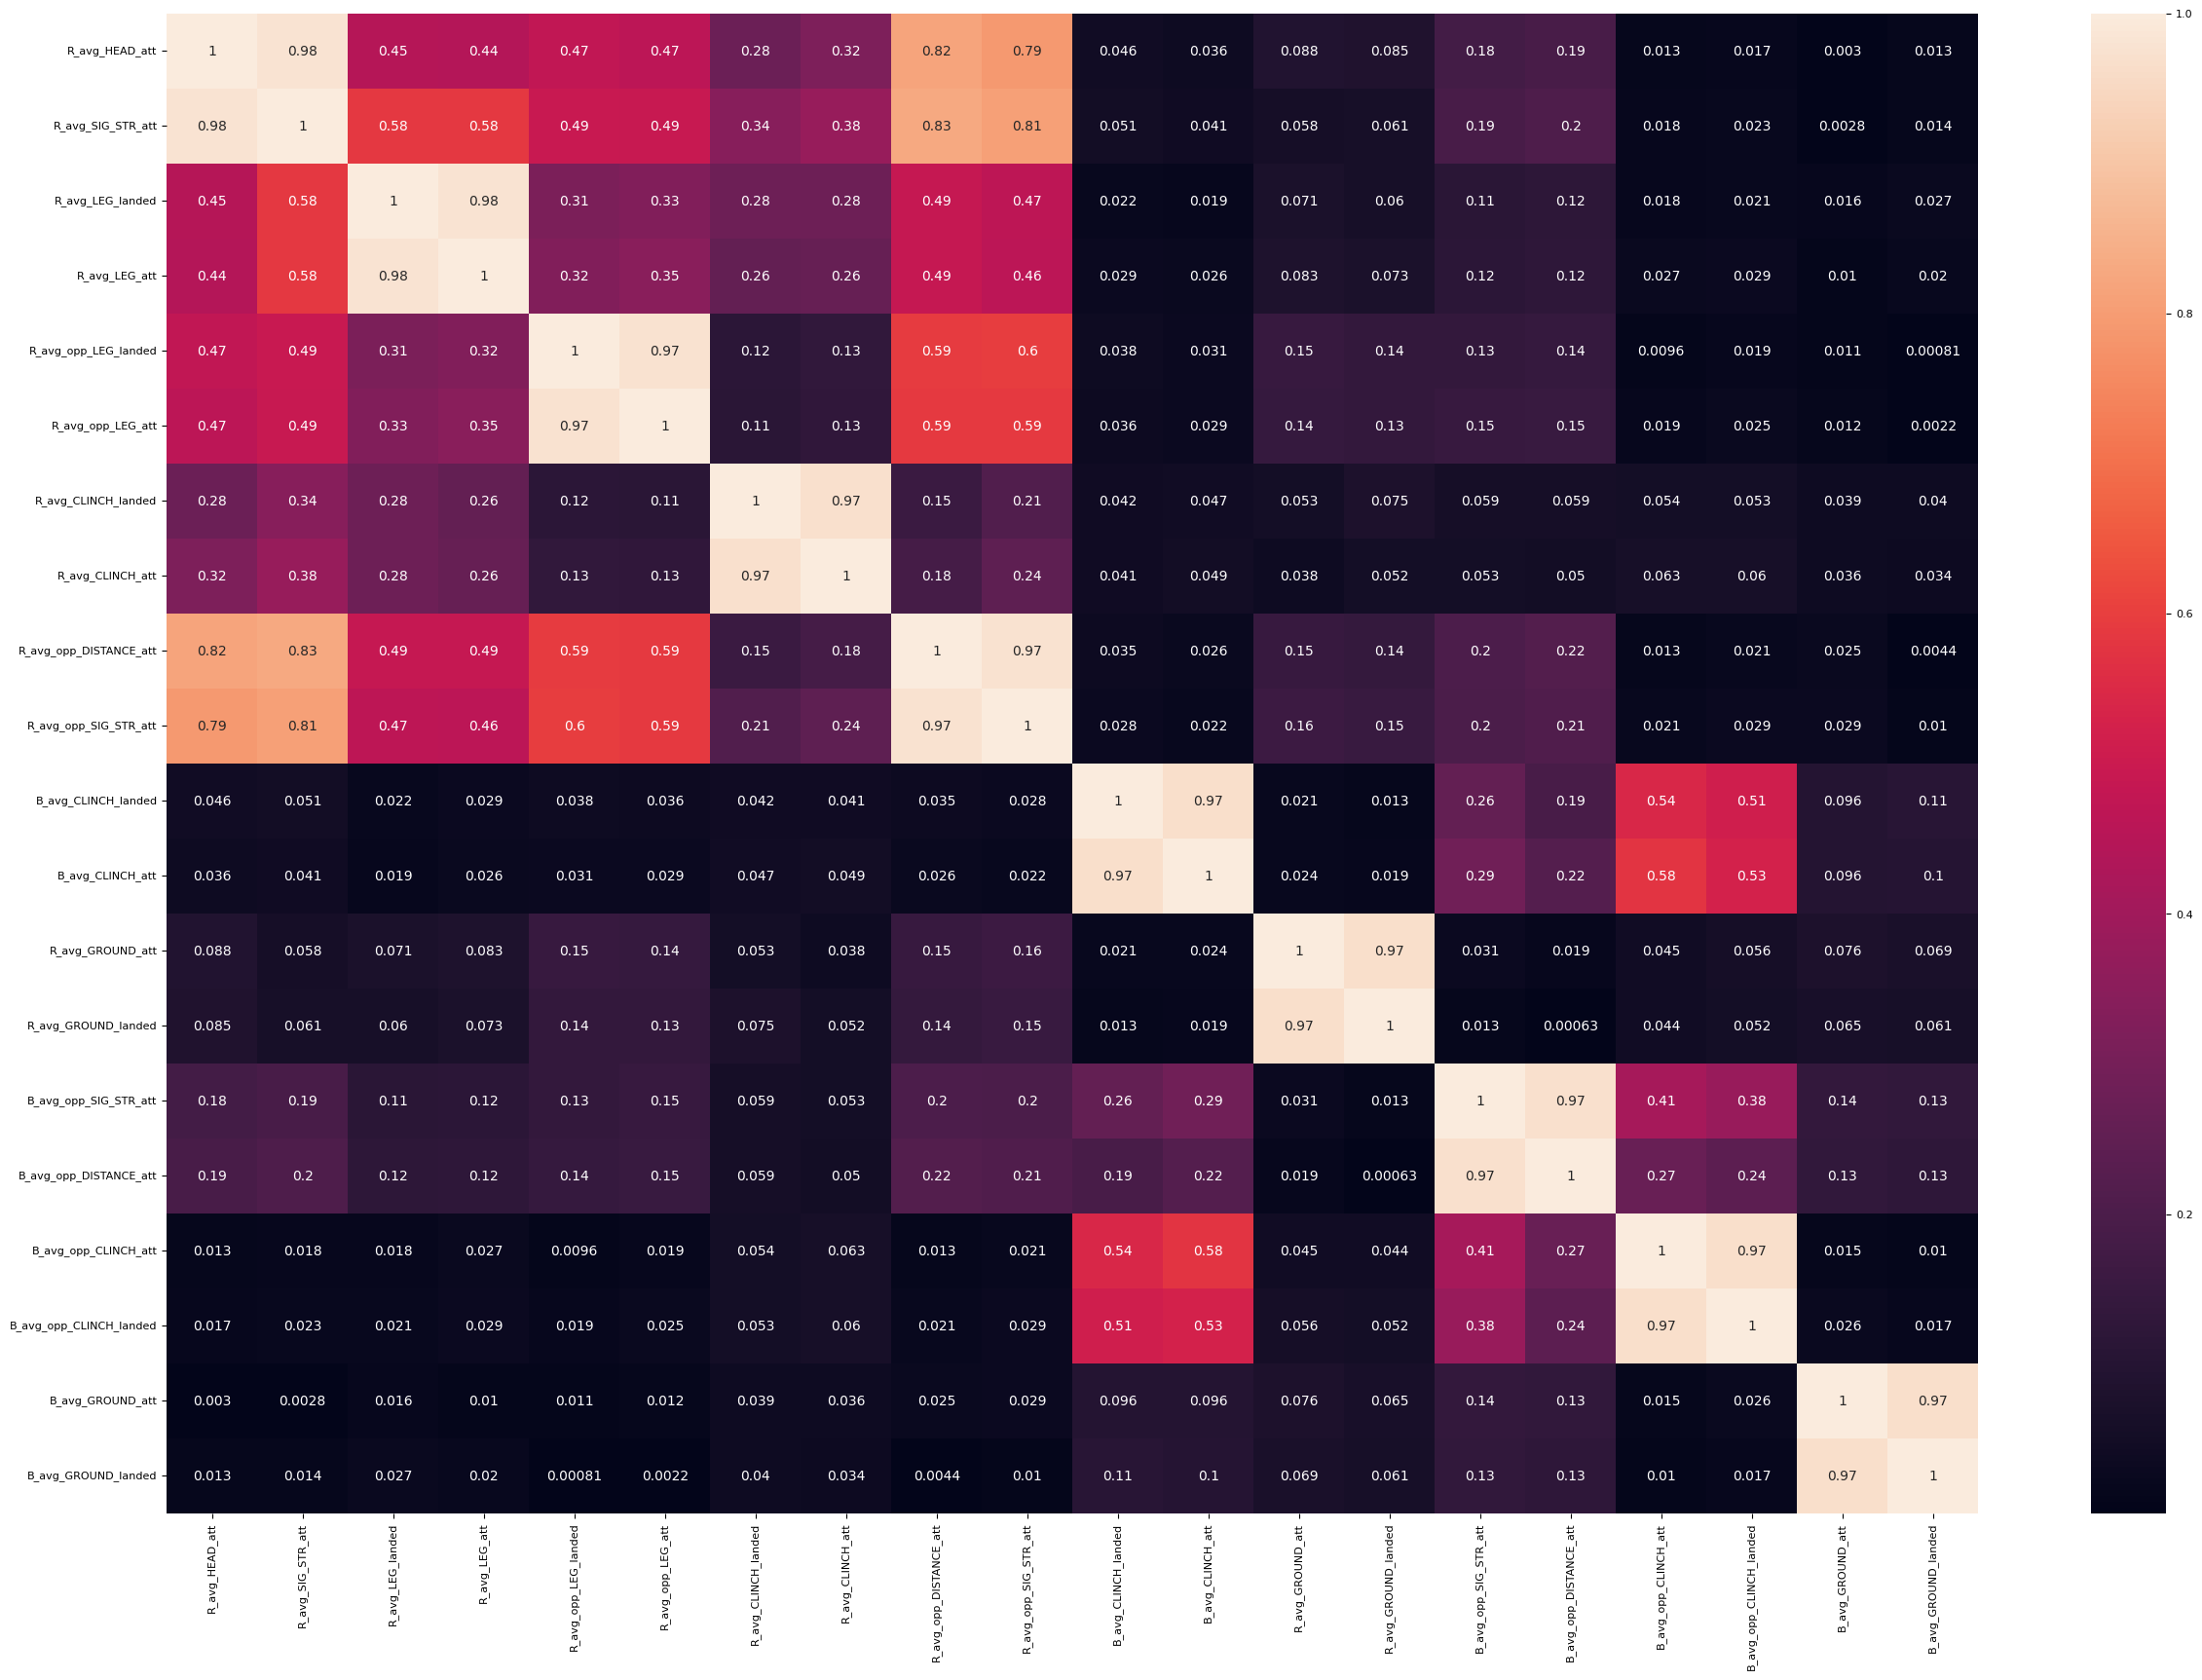

In [20]:
columns_list = [
    'R_avg_HEAD_att', 'R_avg_SIG_STR_att',
    'R_avg_LEG_landed', 'R_avg_LEG_att',
    'R_avg_opp_LEG_landed', 'R_avg_opp_LEG_att',
    'R_avg_CLINCH_landed', 'R_avg_CLINCH_att',
    'R_avg_opp_DISTANCE_att', 'R_avg_opp_SIG_STR_att',
    'B_avg_CLINCH_landed', 'B_avg_CLINCH_att',
    'R_avg_GROUND_att', 'R_avg_GROUND_landed',
    'B_avg_opp_SIG_STR_att', 'B_avg_opp_DISTANCE_att',
    'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed',
    'B_avg_GROUND_att', 'B_avg_GROUND_landed'
]

data_ = data[columns_list].dropna()

# Calculate correlation matrix for all variables in raw dataset
corr_matrix = data_[columns_list].corr().abs()

# Unpack matrix and convert to list of pairs of variables that can be sorted and iterated over
correlations = corr_matrix.stack().sort_values(ascending=False)
correlations = correlations.iloc[data_.shape[1]-1::2]

# Print the ten largest correlations
print(correlations.head(10))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True);

# Time Series Analysis

Following the initial exploratory data analysis (EDA), we now turn our attention to the examination of how specific variables within the dataset have evolved over time. As indicated in the "Matches per Year" section, there is preliminary evidence of temporal trends within the UFC. While identifying the underlying causes of these trends may require domain-specific expertise that is beyond the scope of this analysis, we aim to highlight and interpret observable patterns.

To this end, we analyze the temporal behavior of a set of preselected variables from the dataset. These variables, chosen based on their demonstrated trends, are listed in the vars_of_interest collection. For each variable, we compute the annual average and visualize these changes using scatter plots. Additionally, the coefficient of determination (R²) is calculated to assess the strength of the observed trends. For variables exhibiting significant trends, we also derive the corresponding regression equations.

The analysis reveals notable variability in the trends exhibited by different variables. The first three variables demonstrate clear, positive, and linear trends. For instance, in the case of B_avg_BODY_att, which represents the number of body strikes attempted by Fighter B, the data suggests an annual increase of approximately 0.435 strikes.

Conversely, the next three variables—B_Weight_cms, B_Height_cms, and B_Reach_lbs (indicating Fighter B's weight, height, and reach, respectively)—display downward linear trends. The shared trend across these physically related variables is expected, with the decline potentially reflecting a broader evolution in the UFC meta, where changes in fighting techniques and strategies appear to favor smaller, lighter fighters over time.

The final set of variables exhibits more complex patterns. For instance, B_avg_KD (the average number of knockdowns by Fighter B) remains relatively stable across the time period under study, suggesting that the frequency of knockdowns has remained largely unchanged, aside from occasional outliers. The last four variables present distributions that appear to bifurcate around a specific inflection point, most notably in the case of the no_of_rounds variable. This divergence may be attributed to structural changes within the UFC, such as the significant rule modification implemented in 2001, which likely accounts for the observed shift in the data.


B_avg_BODY_att:
coefficient of determination: 0.9573856664310983
B_avg_BODY_att = -947.163860533622 + 0.4750888838892009 * year


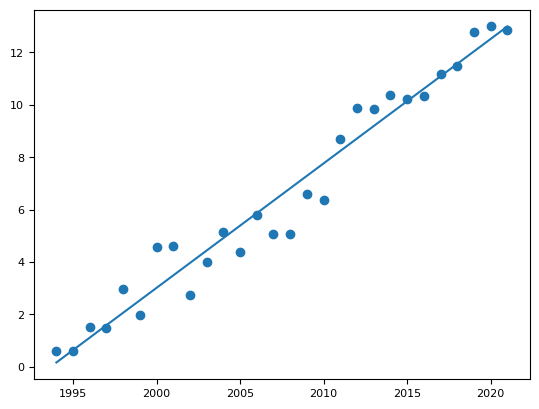


B_wins:
coefficient of determination: 0.8239997791265459
B_wins = -183.64437982196773 + 0.09250461896539168 * year


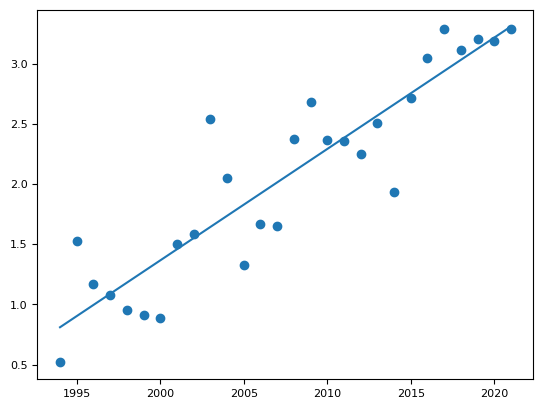


B_longest_win_streak:
coefficient of determination: 0.704351158687462
B_longest_win_streak = -88.68891851298486 + 0.044868445503389184 * year


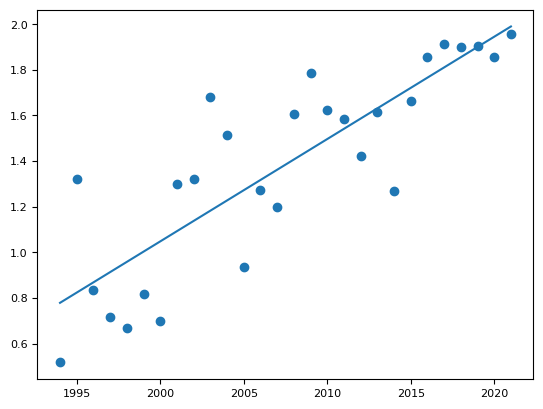


B_Weight_lbs:
coefficient of determination: 0.8562398694790618
B_Weight_lbs = 5722.198824737712 + -2.757558172353434 * year


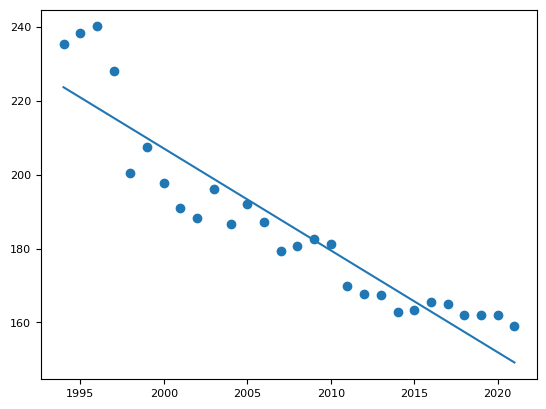


B_Height_cms:
coefficient of determination: 0.7236285425120461
B_Height_cms = 714.6663644817751 + -0.2660698415611011 * year


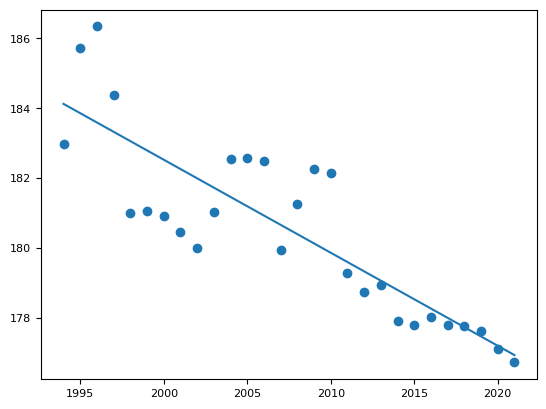


B_Reach_cms:
coefficient of determination: 0.46780978318644284


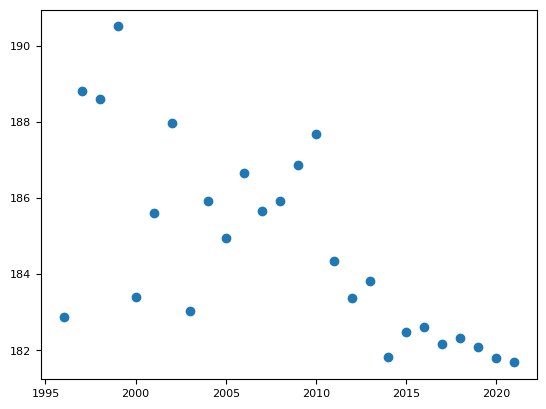


B_avg_KD:
coefficient of determination: 0.23906102327677892


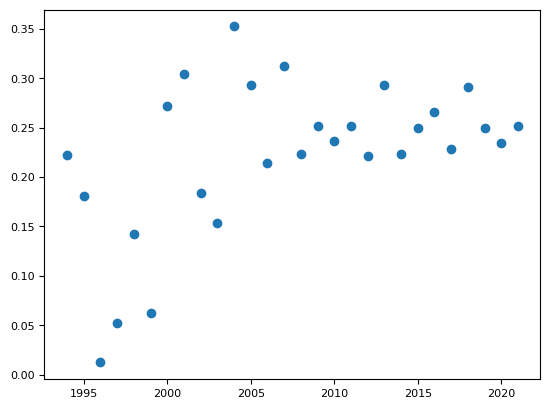


B_total_rounds_fought:
coefficient of determination: 0.9286560510331363
B_total_rounds_fought = -909.7339476938203 + 0.456553731159833 * year


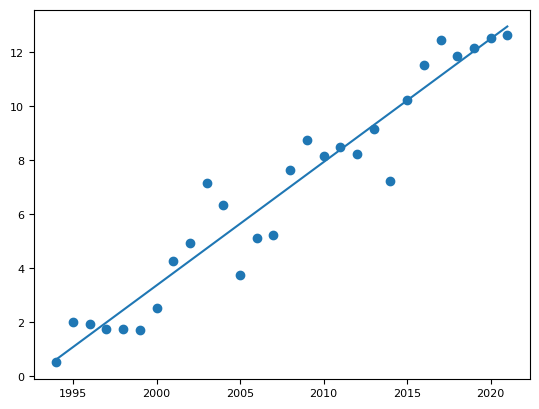


B_avg_GROUND_att:
coefficient of determination: 0.03602085699128521


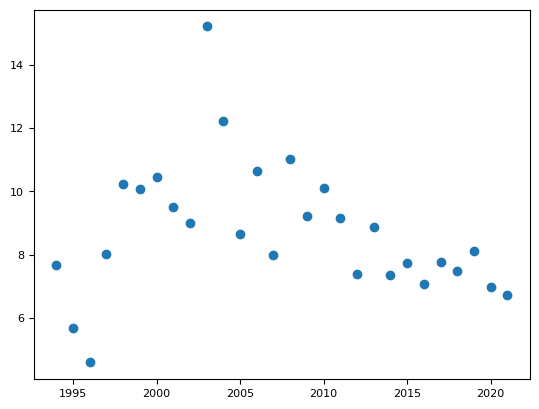


B_avg_opp_KD:
coefficient of determination: 0.41692534447287966


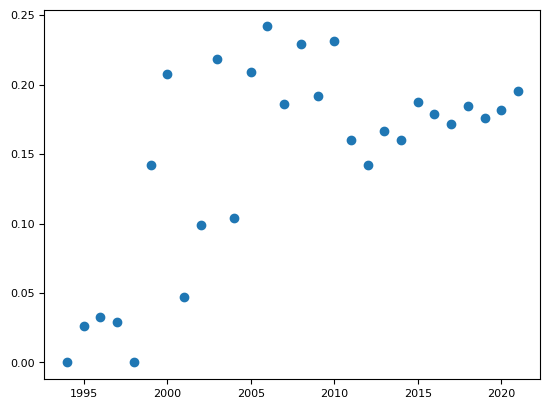


B_avg_SIG_STR_pct:
coefficient of determination: 0.35211556415395895


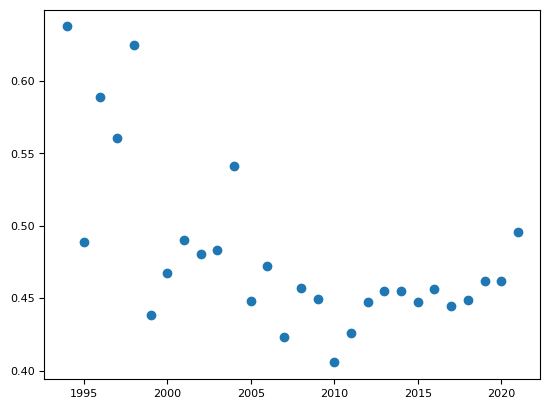

In [21]:
# List of variables to look at
vars_of_interest = ['B_avg_BODY_att','B_wins', 'B_longest_win_streak',
                    'B_Weight_lbs', 'B_Height_cms', 'B_Reach_cms',
                    'B_avg_KD',
                    'B_total_rounds_fought',
                    'B_avg_GROUND_att', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct']

# Iterate through the list
for col in vars_of_interest:
    data_ = data.dropna(subset=[col])
    print("\n" + col + ":")

    # Calculate average of the stat for each year
    yrs = data.groupby(data_['date'].dt.year)[col].mean().dropna()

    # Construct independent/dependent variables and fit a linear regression
    x = yrs.index.values.reshape(-1,1)
    y = yrs.values
    model = LinearRegression().fit(x, y)

    # Calculate the strength of the trend and, if strong enough, display the regression equation
    print('coefficient of determination:', model.score(x, y))
    if model.score(x, y) > .6:

        plt.plot(x, model.predict(x))
        print(col + " = " + str(model.intercept_) + " + " + str(model.coef_[0]) + " * year")

    # Construct and display the scatter plot
    plt.scatter(x, y)
    plt.show()

# Best Fighters Throughout UFC History

Some statistics show a clear correlation with time, but a closer examination of the distributions reveals that the outliers provide additional, valuable insights. The averages reflect a continuous evolution in the sport, indicating that fighters, in general, have improved as mixed martial arts (MMA) has grown. While the year-over-year trends for each statistic may show only minor variations, the presence of outliers suggests that certain fighters excelled in specific aspects of the fight game. These aspects may include striking, grappling, defense, or even career longevity. In this context, the ongoing debate regarding the "Greatest of All Time" (GOAT) in MMA remains ever-present and dynamic. The emergence of new fighters, evolving fighting styles, and new champions each year ensures that the conversation remains fresh, making it compelling to identify which fighters stood out during their respective eras or throughout UFC history.

For this analysis, we have filtered the data to include only fighters who have competed in at least 10 UFC bouts and belong to the Modern era, starting from UFC 28, which took place on November 17, 2000. Prior to this was the Pioneer era, during which UFC rules, fighters, and public exposure were still rapidly evolving, leading to significant outliers in the data. Furthermore, this analysis focuses on fighters who predominantly competed on the red side, as they are typically more prominent, and those considered among the best are likely to have fought most of their matches on the red side

In [22]:
data_filtered = data[(data['R_wins'] + data['R_losses'] >= 10) & (data['date'] > datetime.datetime(2000, 10, 17))]

# Here are some examples of top 10 fighters in some statistics:

# Here are some top 10 fighters from the striking portion of the data.
print(data_filtered.sort_values(by=['R_avg_HEAD_landed'], ascending=False)[['R_fighter','R_avg_HEAD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(10))

# Here are some top 10 fighters in the grappling portion of the data.
print(data_filtered.sort_values(by=['R_avg_TD_landed'], ascending=False)[['R_fighter','R_avg_TD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(10))

# Here are some top 10 fighters for career statistics.
print(data_filtered.sort_values(by=['R_total_title_bouts'], ascending=False)[['R_fighter','R_total_title_bouts']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(10))

# Here are the top 10 fighters in the defensive perspectives.
print(data_filtered.sort_values(by=['R_avg_opp_HEAD_landed'], ascending=True)[['R_fighter','R_avg_opp_HEAD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(10))

                R_fighter  R_avg_HEAD_landed
951          Max Holloway         173.163765
4110            Nate Diaz         113.912476
1219  Khabib Nurmagomedov          98.111328
258       Colby Covington          96.001953
85         Dustin Poirier          94.659253
383          Kamaru Usman          88.666016
2494         TJ Dillashaw          87.945312
2229           Neil Magny          86.625244
1589          Cub Swanson          86.353516
4181            Nick Diaz          84.257812
               R_fighter  R_avg_TD_landed
4521   Georges St-Pierre         9.133423
50        Curtis Blaydes         8.229980
2645  Demetrious Johnson         7.758301
2463     Johny Hendricks         6.521912
1251     Jessica Andrade         6.483398
1223        Gray Maynard         6.088142
3721      Cain Velasquez         5.951172
959          Wilson Reis         5.818848
786      Colby Covington         5.544922
2260       Darren Elkins         5.482422
               R_fighter  R_total_title_bou

To further refine the analysis, several additional statistics from each category will be collected, focusing on the top-performing fighters in each. To streamline this process, only the top 50 fighters for each statistic will be considered. The objective is to determine which fighter appears most frequently across all the evaluated statistics within each category. Following this, an aggregated ranking will be calculated to identify the overall top performer. This aggregation will be conducted by ranking the top 50 fighters for each statistic and summing their reversed positions. Specifically, a fighter ranked 1st will receive 50 points, 2nd place will receive 49 points, and so on, with lower rankings receiving progressively fewer points. This method ensures that higher-ranked fighters in each statistic are weighted more heavily in the final overall ranking.

In [23]:
# Sorting and trimming data from each statistic

# Striking
d1 = data_filtered.sort_values(by=['R_avg_TOTAL_STR_landed'], ascending=False)[['R_fighter','R_avg_TOTAL_STR_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_TOTAL_STR_landed'], ascending=True).reset_index(drop=True);
d2 = data_filtered.sort_values(by=['R_avg_SIG_STR_landed'], ascending=False)[['R_fighter','R_avg_SIG_STR_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_SIG_STR_landed'], ascending=True).reset_index(drop=True);
d3 = data_filtered.sort_values(by=['R_avg_KD'], ascending=False)[['R_fighter','R_avg_KD']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_KD'], ascending=True).reset_index(drop=True);
d4 = data_filtered.sort_values(by=['R_avg_BODY_landed'], ascending=False)[['R_fighter','R_avg_BODY_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_BODY_landed'], ascending=True).reset_index(drop=True);
d5 = data_filtered.sort_values(by=['R_avg_HEAD_landed'], ascending=False)[['R_fighter','R_avg_HEAD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_HEAD_landed'], ascending=True).reset_index(drop=True);
d6 = data_filtered.sort_values(by=['R_avg_DISTANCE_landed'], ascending=False)[['R_fighter','R_avg_DISTANCE_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_DISTANCE_landed'], ascending=True).reset_index(drop=True);
d7 = data_filtered.sort_values(by=['R_avg_LEG_landed'], ascending=False)[['R_fighter','R_avg_LEG_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(10).head(51).sort_values(by=['R_avg_LEG_landed'], ascending=True).reset_index(drop=True);

# Grappling
d8 = data_filtered.sort_values(by=['R_avg_SUB_ATT'], ascending=False)[['R_fighter','R_avg_SUB_ATT']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_SUB_ATT'], ascending=True).reset_index(drop=True);
d9 = data_filtered.sort_values(by=['B_avg_TD_landed'], ascending=False)[['R_fighter','R_avg_TD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_TD_landed'], ascending=True).reset_index(drop=True);
d10 = data_filtered.sort_values(by=['R_avg_TD_pct'], ascending=False)[['R_fighter','R_avg_TD_pct']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_TD_pct'], ascending=True).reset_index(drop=True);
# d11 = data_filtered.sort_values(by=['R_avg_PASS'], ascending=False)[['R_fighter','R_avg_PASS']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_PASS'], ascending=True).reset_index(drop=True);
d12 = data_filtered.sort_values(by=['B_avg_REV'], ascending=False)[['R_fighter','R_avg_REV']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_REV'], ascending=True).reset_index(drop=True);

# Career
d13 = data_filtered.sort_values(by=['R_total_title_bouts'], ascending=False)[['R_fighter','R_total_title_bouts']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_total_title_bouts'], ascending=True).reset_index(drop=True);
d14 = data_filtered.sort_values(by=['R_longest_win_streak'], ascending=False)[['R_fighter','R_longest_win_streak']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_longest_win_streak'], ascending=True).reset_index(drop=True);
d15 = data_filtered.sort_values(by=['R_total_rounds_fought'], ascending=False)[['R_fighter','R_total_rounds_fought']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_total_rounds_fought'], ascending=True).reset_index(drop=True);
d16 = data_filtered.sort_values(by=['R_wins'], ascending=False)[['R_fighter','R_wins']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_wins'], ascending=True).reset_index(drop=True);
d17 = data_filtered.sort_values(by=['R_total_title_bouts'], ascending=False)[['R_fighter','R_total_title_bouts']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_total_title_bouts'], ascending=True).reset_index(drop=True);

# Defensive
d18 = data_filtered.sort_values(by=['R_avg_opp_HEAD_landed'], ascending=True)[['R_fighter','R_avg_opp_HEAD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_HEAD_landed'], ascending=False).reset_index(drop=True);
d19 = data_filtered.sort_values(by=['R_avg_opp_DISTANCE_landed'], ascending=True)[['R_fighter','R_avg_opp_DISTANCE_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_DISTANCE_landed'], ascending=False).reset_index(drop=True);
d20 = data_filtered.sort_values(by=['R_avg_opp_TOTAL_STR_landed'], ascending=True)[['R_fighter','R_avg_opp_TOTAL_STR_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_TOTAL_STR_landed'], ascending=False).reset_index(drop=True);
d21 = data_filtered.sort_values(by=['R_avg_opp_BODY_landed'], ascending=True)[['R_fighter','R_avg_opp_BODY_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_BODY_landed'], ascending=False).reset_index(drop=True);
d22 = data_filtered.sort_values(by=['R_avg_opp_SIG_STR_pct'], ascending=True)[['R_fighter','R_avg_opp_SIG_STR_pct']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_SIG_STR_pct'], ascending=False).reset_index(drop=True);

In [24]:
# sum up all the ranks of each fighter

best_striker = {}
data_sets = [d1, d2, d3, d4, d5, d6, d7]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['R_fighter']
        if name in best_striker: best_striker[name] = best_striker.get(name, 0) + row_index
        else: best_striker[name] = row_index

sorted(best_striker.values())
sorted(best_striker, key=best_striker.get, reverse=True)[:10]

['Kamaru Usman',
 'Cub Swanson',
 'Max Holloway',
 'TJ Dillashaw',
 'Nate Diaz',
 'Colby Covington',
 'Dustin Poirier',
 'Pedro Munhoz',
 'Tony Ferguson',
 'Aljamain Sterling']

In [25]:
best_grappler = {}
data_sets = [d8, d9, d10, d12]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['R_fighter']
        if name in best_grappler: best_grappler[name] = best_grappler.get(name, 0) + row_index
        else: best_grappler[name] = row_index

sorted(best_grappler.values())
sorted(best_grappler, key=best_grappler.get, reverse=True)[:10]

['Georges St-Pierre',
 'Matt Hughes',
 'Chris Lytle',
 'Jim Miller',
 'BJ Penn',
 'Charles Oliveira',
 'Demetrious Johnson',
 'Demian Maia',
 'Rani Yahya',
 'Ed Herman']

In [26]:
best_career = {}
data_sets = [d13, d14, d15, d16, d17]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['R_fighter']
        if name in best_career: best_career[name] = best_career.get(name, 0) + row_index
        else: best_career[name] = row_index

sorted(best_career.values())
sorted(best_career, key=best_career.get, reverse=True)[:10]

['Jon Jones',
 'Georges St-Pierre',
 'Max Holloway',
 'Demetrious Johnson',
 'Anderson Silva',
 'Frankie Edgar',
 'Randy Couture',
 'Andrei Arlovski',
 'Tito Ortiz',
 'Matt Hughes']

In [27]:
best_defense = {}
data_sets = [d18, d19, d20, d21, d22]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['R_fighter']
        if name in best_defense: best_defense[name] = best_defense.get(name, 0) + row_index
        else: best_defense[name] = row_index

sorted(best_defense.values())
sorted(best_defense, key=best_defense.get, reverse=True)[:10]

['Melvin Guillard',
 'Anderson Silva',
 'Demian Maia',
 'Anthony Johnson',
 'Georges St-Pierre',
 'Matt Lindland',
 'Vitor Belfort',
 'Gabriel Gonzaga',
 'Jim Miller',
 'Curtis Blaydes']

In [28]:
best_overall = {}
data_sets = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d22]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['R_fighter']
        if name in best_overall: best_overall[name] = best_overall.get(name, 0) + row_index
        else: best_overall[name] = row_index

sorted(best_overall.values())
sorted(best_overall, key=best_overall.get, reverse=True)[:25]

['Georges St-Pierre',
 'Jon Jones',
 'Max Holloway',
 'Anderson Silva',
 'Matt Hughes',
 'Demian Maia',
 'Demetrious Johnson',
 'Dustin Poirier',
 'Jim Miller',
 'Kamaru Usman',
 'Chuck Liddell',
 'Andrei Arlovski',
 'Randy Couture',
 'Frankie Edgar',
 'Rafael Dos Anjos',
 'Tony Ferguson',
 'Tito Ortiz',
 'Nate Diaz',
 'Michael Bisping',
 'TJ Dillashaw',
 'BJ Penn',
 'Cub Swanson',
 'Joanna Jedrzejczyk',
 'Donald Cerrone',
 'Melvin Guillard']

Using this organizational method, we generate a list of the 25 statistically best fighters in the UFC's modern era. While this analysis is not exhaustive, as many factors contribute to a fighter's overall performance, it successfully identifies many of the most notable fighters in UFC history. Particularly with the top four—Georges St-Pierre, Jon Jones, Demetrious Johnson, and Anderson Silva—this list highlights fighters who are frequently mentioned in the "Greatest of All Time" (GOAT) discussion. Any new fighter entering this debate must be compared against these four, who have set the benchmark for excellence in the sport.

# Geographical Analysis

The raw dataset contains information on the city where each UFC fight took place, enabling an analysis of the geographic distribution of UFC events. Initially, we aimed to map these fights individually by using each city's latitude and longitude to plot their locations. This was achieved by utilizing Nominatim, a free API that provides geographical data when given an address. To avoid excessive use of this resource, API calls were made only for unique locations within the dataset. The resulting geographical data was temporarily stored in a Python dictionary, converted to a Pandas DataFrame, and then saved as a CSV file, location_map.csv, for future reference. This approach allows the information to be easily accessed without repeated API calls.

In [29]:
# Code for grabbing latitude and longitude for each observation (original API call data was saved to a CSV, now reading from the CSV)

# Construct a simplified dataframe that will contain only date and location information
df_geo = data[['date', 'location']].copy()

# Initialize 'Lat' and 'Long' columns
df_geo['Lat'] = "0"
df_geo['Long'] = "0"

# Construct dictionary of locations to lat/long tuples using API calls
geolocator = Nominatim(user_agent="320 City Analysis")
loc_map = {}
for loc in df_geo['location'].unique():
    result = geolocator.geocode(loc)
    if result:
        loc_map[loc] = (result.point[0], result.point[1])

# Convert dictionary to dataframe df_locs that can be written to drive for storage
[lat, long] = list(map(list, zip(*list(loc_map.values()))))
data = {'Location': list(loc_map.keys()), 'Lat': lat, 'Long': long}
df_locs = pd.DataFrame(data)

# Write df_locs to a CSV
df_locs.to_csv("/content/drive/MyDrive/Data Mining Project/long_lat_map.csv", index=False)


# Read the location mapping from CSV into a dataframe
df_locs = pd.read_csv("/content/drive/MyDrive/Data Mining Project/long_lat_map.csv")[['Location', 'Lat', 'Long']].copy()

# Merge location data with latitude and longitude into df_geo
df_geo = df_geo.merge(df_locs, left_on='location', right_on='Location', how='left')

# Drop the extra 'Location' column that was added during the merge
df_geo = df_geo.drop(columns=['Lat_x', 'Long_x', 'Location'])

# Output the final dataframe
df_geo.sample(4)


date                             location      Lat_y      Long_y
1506 2018-02-10  Perth, Western Australia, Australia -31.955893  115.860585
1367 2018-06-09               Chicago, Illinois, USA  41.875562  -87.624421
2729 2015-07-12               Las Vegas, Nevada, USA  36.167256 -115.148516
694  2019-10-05       Melbourne, Victoria, Australia -37.814245  144.963173

With the latitude and longitude data for each observation, we can generate a heatmap visualizing the geographical distribution of UFC fights throughout history (as depicted below). However, the heatmap presents a limitation: it becomes "hotter" when multiple points are in close proximity, rather than when they overlap. Given that much of the location data corresponds to recurring cities, this issue makes it challenging to accurately represent areas with high concentrations of fights. For instance, although Las Vegas, Nevada, hosts a significant number of UFC events, the map displays only a single point for the entire series of fights in that location, thereby underrepresenting the true fight density in the region.

In [30]:
# Function to overlay a heatmap on the provided map using data in the provided dataframe
def heat_map(m, df):
    # convert to (n, 2) nd-array format
    leadsArr = df[['Lat_y', 'Long_y']].to_numpy()

    # plot heatmap
    m.add_child(plugins.HeatMap(leadsArr, radius=15))

    return m

# Construct a map and overlay the heatmap
m = folium.Map([df_geo['Lat_y'].mean(), df_geo['Long_y'].mean()], zoom_start=3)
m = heat_map(m, df_geo)

m

# Fights by Country

To more accurately identify the geographic distribution of UFC fights, a bar graph can be used to present the data in a more straightforward format. The graph below illustrates the number of fights held in each country, as recorded in the dataset. It is evident that the United States leads by a significant margin, reflecting the fact that UFC events are predominantly held in the U.S., where the sport enjoys its greatest popularity compared to other nations.

<ipython-input-31-679f1fe3974c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_geo['Country'], data=df_geo, palette='Set1');
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a leng

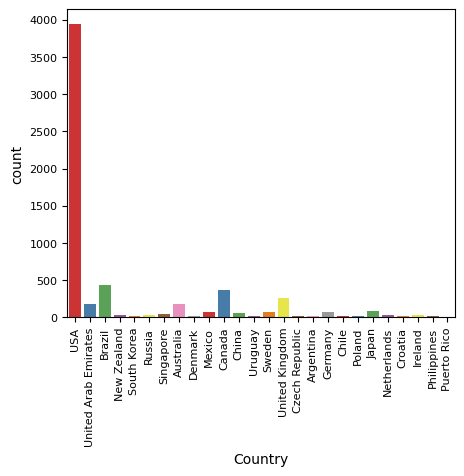

In [31]:
# Iterate through every observation in the set
for index, row in df_geo.iterrows():
    # Split up the location record into city, state, and country where possible
    parts = row['location'].split(',')

    df_geo.loc[index, 'Country'] = parts[-1].strip()
    df_geo.loc[index, 'City'] = parts[0].strip()
    if len(parts) == 3:
        df_geo.loc[index, 'State'] = parts[1].strip()

# Construct the count plot grouped by country
plt.figure(figsize=(5,4))
plt.xticks(rotation=90)
sns.countplot(x=df_geo['Country'], data=df_geo, palette='Set1');

# Fights by State

Having established that the United States hosts the majority of UFC fights, we can further analyze the specific locations of these events by examining the distribution across individual states. To achieve this, we filter the dataset to include only observations from the U.S. and then group the data by state, generating a table that displays the number of fights held in each state. It is important to note that the library used in the subsequent analysis requires state abbreviations rather than full state names. Therefore, we convert the state names to their corresponding abbreviations using a reference file, state_abbreviations.csv, created specifically for this purpose. The final table is presented below.

In [32]:
# Select all observations that occurred in the US and group by state
usa_fights = df_geo[df_geo['Country'] == "USA"]
counts = usa_fights.groupby('State').count()[['date']].rename(columns={'date': 'Count'}).reset_index()
counts.head()

State  Count
0      Alabama     46
1      Arizona     50
2   California    327
3     Colorado     99
4  Connecticut     41

# Preprocessing

In this stage, we focus on preparing the UFC dataset for analysis. First, we select relevant columns such as fighter reach, fight outcomes, weight class, and fight statistics. Then, we handle missing or null values using several methods, including removing rows with excessive missing data, filling null values with appropriate statistical measures (mean, median), or using domain-specific values when necessary. This ensures that the dataset is clean and ready for accurate analysis.

In [33]:
data = pd.read_csv("/content/drive/MyDrive/Data Mining Project/data.csv")
print(f'Number of rows and columns : ',data.shape)
for col in data :
  print(col)

Number of rows and columns :  (6012, 144)
R_fighter
B_fighter
Referee
date
location
Winner
title_bout
weight_class
B_avg_KD
B_avg_opp_KD
B_avg_SIG_STR_pct
B_avg_opp_SIG_STR_pct
B_avg_TD_pct
B_avg_opp_TD_pct
B_avg_SUB_ATT
B_avg_opp_SUB_ATT
B_avg_REV
B_avg_opp_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_avg_opp_TOTAL_STR_att
B_avg_opp_TOTAL_STR_landed
B_avg_TD_att
B_avg_TD_landed
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_BODY_att
B_avg_BODY_landed
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_LEG_att
B_avg_LEG_landed
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_CTRL_time(sec

### Select Columns

For the column selection phase of our UFC data analysis project, we carefully chose variables that capture key aspects of a fighter's physical attributes, combat performance, and defensive capabilities. These include both red and blue corner fighters' heights ('B_Height_cms', 'R_Height_cms'), weights ('B_Weight_lbs', 'R_Weight_lbs'), reach ('B_Reach_cms', 'R_Reach_cms'), stances ('B_Stance', 'R_Stance'), and ages ('B_age', 'R_age'). To assess offensive performance, we incorporated significant strikes landed per minute ('B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed') and striking accuracy ('B_avg_SIG_STR_pct', 'R_avg_SIG_STR_pct'). Defensive abilities are reflected through opponent strike attempts and landed strikes ('B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed').

For grappling metrics, we included takedowns landed ('B_avg_TD_landed', 'R_avg_TD_landed'), takedown accuracy ('B_avg_TD_att', 'B_avg_TD_pct', 'R_avg_TD_att', 'R_avg_TD_pct'), as well as opponent takedowns ('B_avg_opp_TD_landed', 'B_avg_opp_TD_att', 'R_avg_opp_TD_landed', 'R_avg_opp_TD_att'). Finally, submission attempts per fight ('B_avg_SUB_ATT', 'R_avg_SUB_ATT') were selected to provide insights into fighters' submission skills. This comprehensive set of features ensures that the model captures a wide range of factors influencing fight outcomes.

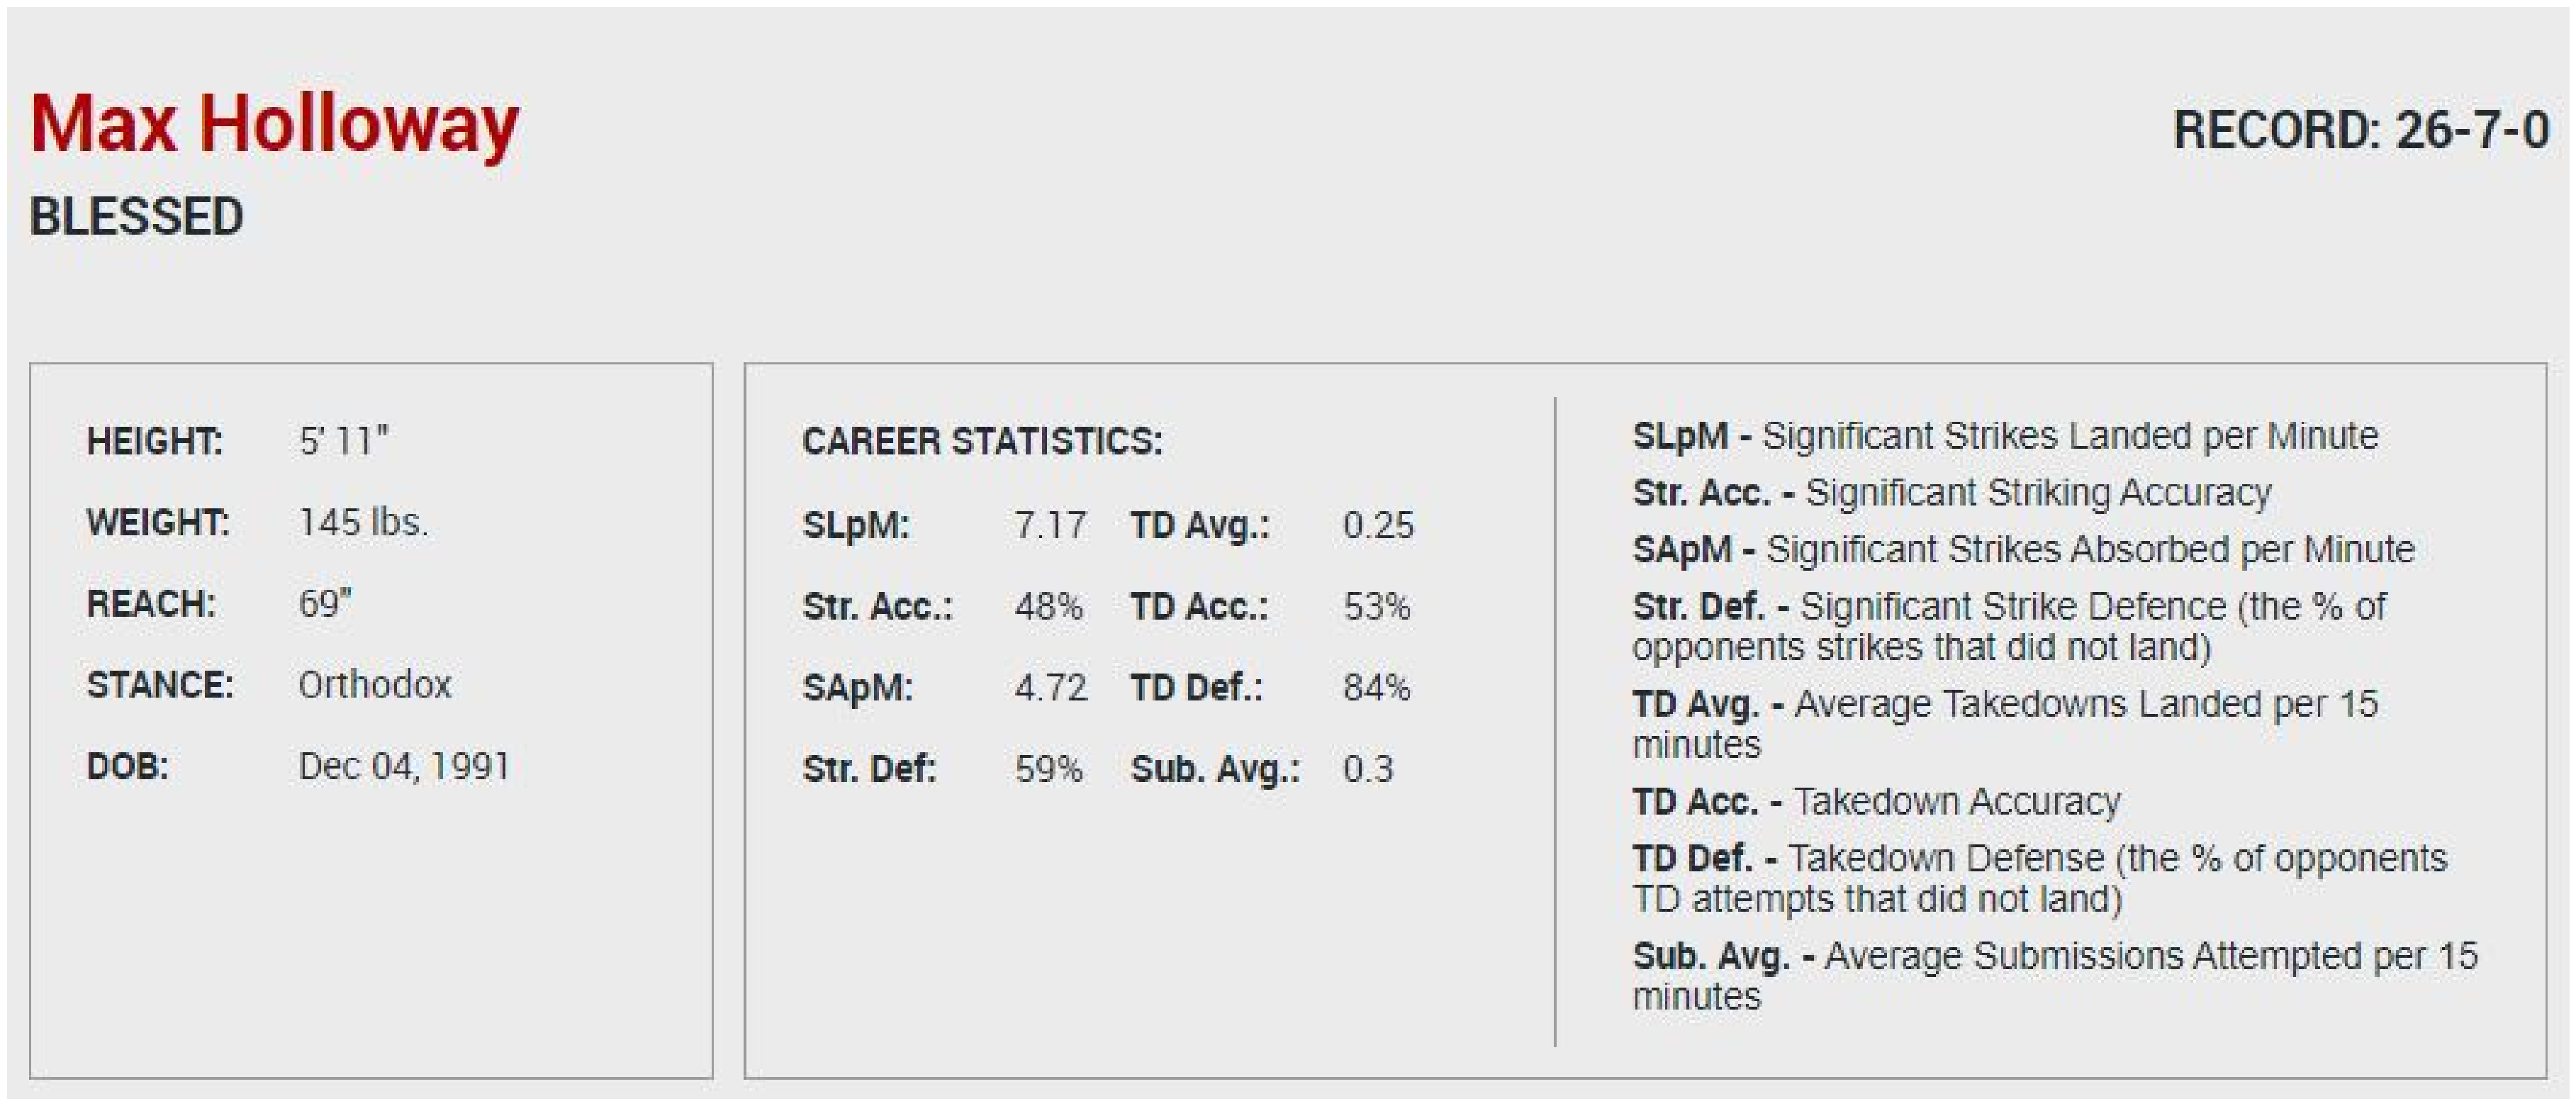

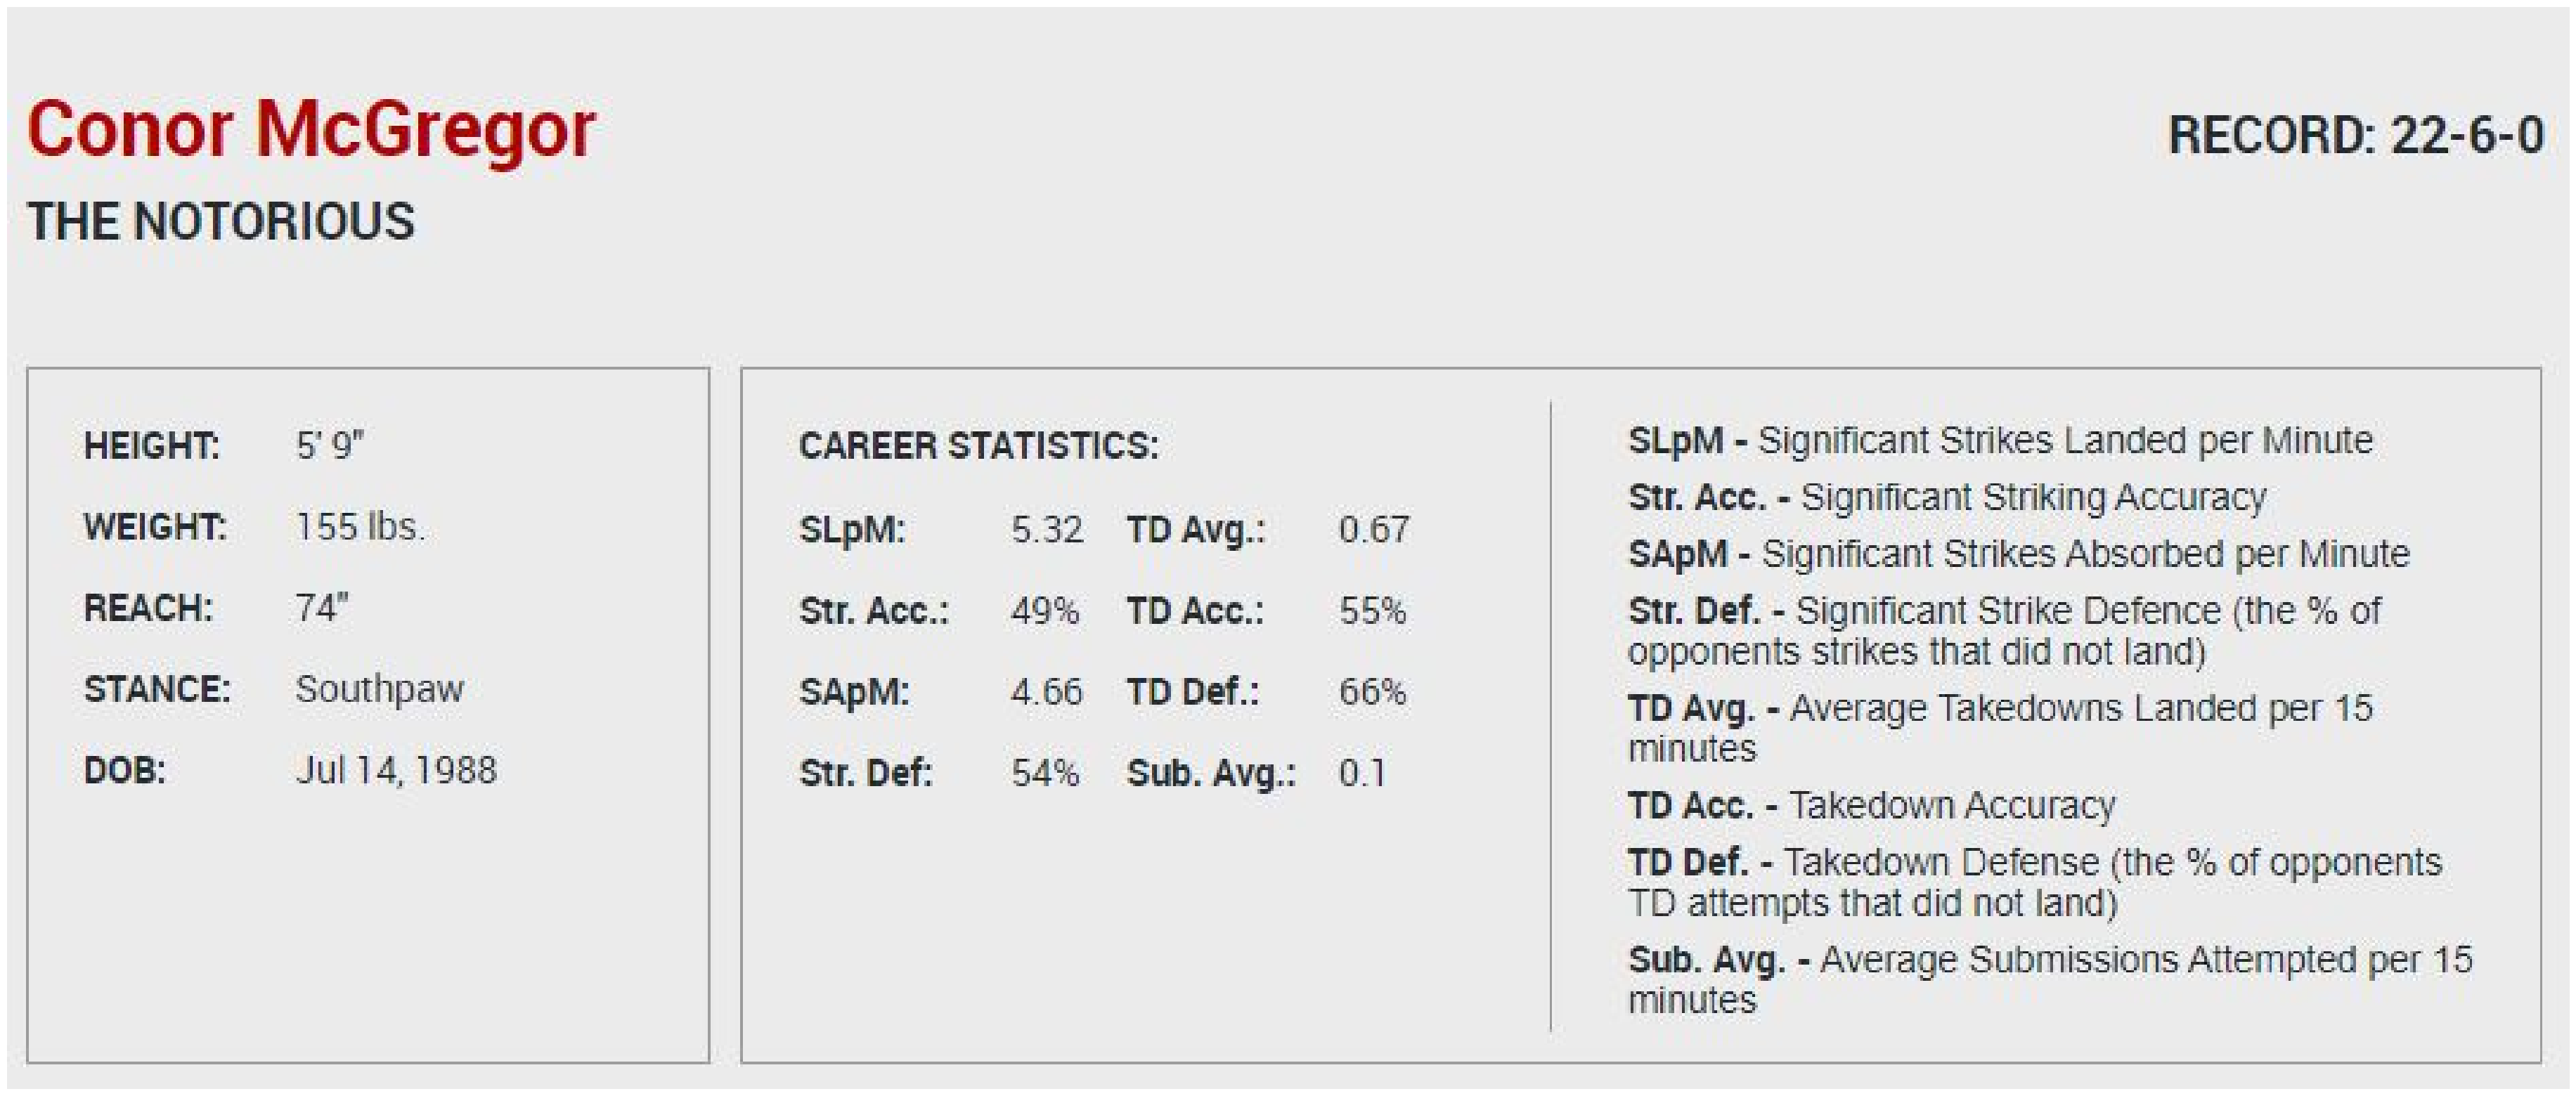

In [34]:
images = os.listdir('/content/drive/MyDrive/Data Mining Project/Images/Model Building')
for image in images :
  img = Image.open(f"/content/drive/MyDrive/Data Mining Project/Images/Model Building/{image}")
  plt.figure(figsize=(50,20))
  plt.imshow(img)
  plt.axis('off')  # Hide axes
  plt.show()

In [35]:
columns_to_train = [
    'B_Height_cms', 'R_Height_cms',
    'B_Weight_lbs', 'R_Weight_lbs',
    'B_Reach_cms', 'R_Reach_cms',
    'B_Stance','R_Stance',
    'B_age','R_age',
    #SLpM
    'B_avg_SIG_STR_landed','R_avg_SIG_STR_landed',
    # Str. Acc
    'B_avg_SIG_STR_pct','R_avg_SIG_STR_pct',
    # SApM
    # 'B_avg_opp_SIG_STR_landed','R_avg_opp_SIG_STR_landed',
    # Str. Def
    # Str Defense Percentage=1−(Average Str Attempts by Opponent/Average Str Landed by Opponent)
    'B_avg_opp_SIG_STR_att','B_avg_opp_SIG_STR_landed',
    'R_avg_opp_SIG_STR_att','R_avg_opp_SIG_STR_landed',
    # TD Avg
    'B_avg_TD_landed','R_avg_TD_landed',
    # TD Acc
    'B_avg_TD_att','B_avg_TD_pct',
    'R_avg_TD_att','R_avg_TD_pct',
    # TD Def
    # Takedown Defense Percentage=1−(Average Takedown Attempts by Opponent/Average Takedowns Landed by Opponent)
    'B_avg_opp_TD_landed','B_avg_opp_TD_att',
    'R_avg_opp_TD_landed','R_avg_opp_TD_att',
    # Sub Avg
    'B_avg_SUB_ATT','R_avg_SUB_ATT',

    'Winner'
]

data_selected_1 = data[columns_to_train]
data_selected_1.shape

(6012, 31)

### B_Height_cms & R_Height_cms:

 The height of the blue corner and red corner fighters, measured in centimeters. Height is an important factor as taller fighters may have a reach advantage.

### B_Weight_lbs & R_Weight_lbs:

The weight of the blue corner and red corner fighters, measured in pounds. Weight can influence strength and power, especially in clinch situations.

### B_Reach_cms & R_Reach_cms:

 The reach of the blue corner and red corner fighters, measured in centimeters. Reach refers to the distance from fingertip to fingertip with arms outstretched, and longer reach may allow fighters to strike opponents while keeping a safe distance.

### B_Stance & R_Stance:

 The fighting stance of the blue corner and red corner fighters (e.g., orthodox, southpaw). Stance affects how fighters position themselves during striking and grappling exchanges.

### B_age & R_age:

 The age of the blue corner and red corner fighters. Age can influence factors such as experience, physical peak, and stamina.

### B_avg_SIG_STR_landed & R_avg_SIG_STR_landed:

The average number of significant strikes landed per minute by the blue corner and red corner fighters. This metric provides an indication of offensive output and striking efficiency.

### B_avg_SIG_STR_pct & R_avg_SIG_STR_pct:

 The percentage of significant strikes landed successfully by the blue corner and red corner fighters. Striking accuracy highlights how often fighters land clean, effective strikes on their opponents.

###B_avg_opp_SIG_STR_att & R_avg_opp_SIG_STR_att:

The average number of significant strikes attempted by the blue corner and red corner fighters’ opponents. This metric helps assess a fighter’s defensive exposure to strikes.

### B_avg_opp_SIG_STR_landed & R_avg_opp_SIG_STR_landed:

 The average number of significant strikes landed by the blue corner and red corner fighters’ opponents. It offers insight into a fighter’s ability to avoid incoming strikes.

###B_avg_TD_landed & R_avg_TD_landed:

 The average number of takedowns successfully landed by the blue corner and red corner fighters. Takedown ability can determine control of the fight, especially in grappling exchanges.

### B_avg_TD_att & R_avg_TD_att:

 The average number of takedown attempts by the blue corner and red corner fighters. This reflects the frequency of attempts to take the fight to the ground.

### B_avg_TD_pct & R_avg_TD_pct:

 The takedown accuracy of the blue corner and red corner fighters, calculated as the percentage of successful takedowns out of total attempts. This attribute measures the efficiency of a fighter’s wrestling.

### B_avg_opp_TD_landed & R_avg_opp_TD_landed:

The average number of takedowns successfully landed by the blue corner and red corner fighters’ opponents. This indicates a fighter’s vulnerability to being taken down.

###B_avg_opp_TD_att & R_avg_opp_TD_att:

 The average number of takedown attempts by the blue corner and red corner fighters’ opponents. It provides an insight into the opponent’s offensive grappling strategy.

### B_avg_SUB_ATT & R_avg_SUB_ATT:

 The average number of submission attempts by the blue corner and red corner fighters. Submission attempts are crucial in grappling and ground exchanges, showing a fighter’s potential to finish the fight through submission techniques.

In [36]:
data_selected_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   B_Height_cms              6002 non-null   float64
 1   R_Height_cms              6008 non-null   float64
 2   B_Weight_lbs              6004 non-null   float64
 3   R_Weight_lbs              6010 non-null   float64
 4   B_Reach_cms               5121 non-null   float64
 5   R_Reach_cms               5606 non-null   float64
 6   B_Stance                  5946 non-null   object 
 7   R_Stance                  5983 non-null   object 
 8   B_age                     5840 non-null   float64
 9   R_age                     5949 non-null   float64
 10  B_avg_SIG_STR_landed      4585 non-null   float64
 11  R_avg_SIG_STR_landed      5300 non-null   float64
 12  B_avg_SIG_STR_pct         4585 non-null   float64
 13  R_avg_SIG_STR_pct         5300 non-null   float64
 14  B_avg_op

### Handling Null Values in Data Preparation

In [37]:
for col in data_selected_1 :
  print(f'Number of null values in {col} : ',data_selected_1[col].isna().sum())

Number of null values in B_Height_cms :  10
Number of null values in R_Height_cms :  4
Number of null values in B_Weight_lbs :  8
Number of null values in R_Weight_lbs :  2
Number of null values in B_Reach_cms :  891
Number of null values in R_Reach_cms :  406
Number of null values in B_Stance :  66
Number of null values in R_Stance :  29
Number of null values in B_age :  172
Number of null values in R_age :  63
Number of null values in B_avg_SIG_STR_landed :  1427
Number of null values in R_avg_SIG_STR_landed :  712
Number of null values in B_avg_SIG_STR_pct :  1427
Number of null values in R_avg_SIG_STR_pct :  712
Number of null values in B_avg_opp_SIG_STR_att :  1427
Number of null values in B_avg_opp_SIG_STR_landed :  1427
Number of null values in R_avg_opp_SIG_STR_att :  712
Number of null values in R_avg_opp_SIG_STR_landed :  712
Number of null values in B_avg_TD_landed :  1427
Number of null values in R_avg_TD_landed :  712
Number of null values in B_avg_TD_att :  1427
Number of

### Remove null Value rows

For handling missing values related to weight and height, we opted to remove rows where these values were null, given that the number of missing entries was relatively low. Specifically, the columns 'B_Height_cms' and 'R_Height_cms' had 10 and 4 missing values, respectively, while 'B_Weight_lbs' and 'R_Weight_lbs' had 8 and 2 missing values. Since these columns are crucial for understanding the physical attributes of fighters and the total count of missing rows was minimal, removing these rows was deemed appropriate. This method preserves the integrity of the dataset without significantly reducing the dataset size, ensuring that key physical metrics are complete for model training.

In [38]:
# drop B_Height_cms ,R_Height_cms, B_Weight_lbs, R_Weight_lbs null rows
data_selected_2 = data_selected_1.dropna(subset=['B_Height_cms', 'R_Height_cms', 'B_Weight_lbs', 'R_Weight_lbs'])
data_selected_2.shape

(6000, 31)

In [39]:
for col in data_selected_2 :
  print(f'Number of null values in {col} : ',data_selected_2[col].isna().sum())

Number of null values in B_Height_cms :  0
Number of null values in R_Height_cms :  0
Number of null values in B_Weight_lbs :  0
Number of null values in R_Weight_lbs :  0
Number of null values in B_Reach_cms :  882
Number of null values in R_Reach_cms :  398
Number of null values in B_Stance :  57
Number of null values in R_Stance :  26
Number of null values in B_age :  163
Number of null values in R_age :  58
Number of null values in B_avg_SIG_STR_landed :  1417
Number of null values in R_avg_SIG_STR_landed :  704
Number of null values in B_avg_SIG_STR_pct :  1417
Number of null values in R_avg_SIG_STR_pct :  704
Number of null values in B_avg_opp_SIG_STR_att :  1417
Number of null values in B_avg_opp_SIG_STR_landed :  1417
Number of null values in R_avg_opp_SIG_STR_att :  704
Number of null values in R_avg_opp_SIG_STR_landed :  704
Number of null values in B_avg_TD_landed :  1417
Number of null values in R_avg_TD_landed :  704
Number of null values in B_avg_TD_att :  1417
Number of 

### Using Linear Regression To Fill Null Values of Reach column


To address the missing values in the reach columns ('B_Reach_cms' and 'R_Reach_cms'), we employed a linear regression approach based on the relationship between fighter height and reach. Initially, we extracted the heights and reaches into separate arrays and removed NaN values to ensure data integrity. The cleaned height data was reshaped for compatibility with the regression model.

A linear regression model was fitted using valid heights as the independent variable and corresponding reach values as the dependent variable. This model provided predictions for reach based on height, allowing us to compute the correlation coefficient, regression coefficient, and intercept.

The results were visualized in a scatter plot, showcasing the relationship between fighter height and reach, along with the fitted regression line. This method effectively filled the null values in the reach columns and established a statistical basis for understanding the relationship between these critical attributes

Regression Coefficient: 1.06
Intercept: -6.44
Correlation Coefficient: 0.89


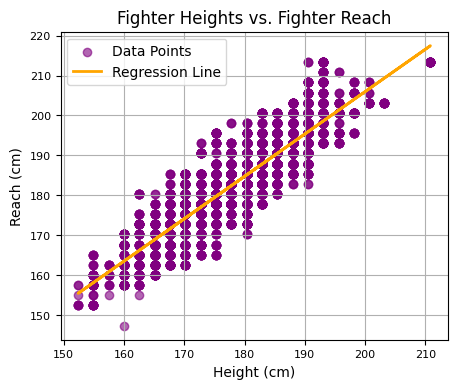

In [40]:
# Extracting heights and reaches into arrays
heights = data_selected_2[['B_Height_cms', 'R_Height_cms']].values.flatten()
reaches = data_selected_2[['B_Reach_cms', 'R_Reach_cms']].values.flatten()

# Remove NaN values from both heights and reaches
valid_indices = ~np.isnan(heights) & ~np.isnan(reaches)
heights_clean = heights[valid_indices]
reaches_clean = reaches[valid_indices]

# Reshape the data for the regression model
heights_reshaped = heights_clean.reshape(-1, 1)  # Reshape for sklearn

# Fit the regression model
model = LinearRegression()
model.fit(heights_reshaped, reaches_clean)

# Predictions
predictions = model.predict(heights_reshaped)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(heights_clean, reaches_clean)[0, 1]

# Print results
print(f"Regression Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_: .2f}")
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Plotting the results
plt.figure(figsize=(5, 4))
plt.scatter(heights_clean, reaches_clean, color='purple', alpha=0.6, label='Data Points')
plt.plot(heights_clean, predictions, color='orange', linewidth=2, label='Regression Line')
plt.title('Fighter Heights vs. Fighter Reach')
plt.xlabel('Height (cm)')
plt.ylabel('Reach (cm)')
plt.legend()
plt.grid()
plt.show()

In [41]:
def fill_na_reach(data):
    """
    Fill NaN values in the reach columns using a regression model based on height.

    Parameters:
    data (DataFrame): DataFrame containing fighter heights and reaches.

    Returns:
    DataFrame: DataFrame with NaN values in the reach columns filled.
    """
    # Extract heights and reaches
    heights = data_selected_2[['B_Height_cms', 'R_Height_cms']].values.flatten()
    reaches = data_selected_2[['B_Reach_cms', 'R_Reach_cms']].values.flatten()

    # Remove NaN values for training the regression model
    valid_indices = ~np.isnan(heights) & ~np.isnan(reaches)
    heights_clean = heights[valid_indices].reshape(-1, 1)
    reaches_clean = reaches[valid_indices]

    # Fit the regression model
    model = LinearRegression()
    model.fit(heights_clean, reaches_clean)

    # Predict reaches where they are NaN
    reach_nan_indices = np.where(np.isnan(reaches))[0]

    # Prepare heights for prediction
    heights_to_predict = heights[reach_nan_indices].reshape(-1, 1)

    # Make predictions for NaN reaches
    predicted_reaches = model.predict(heights_to_predict)

    # Fill the NaN values in the original DataFrame
    for i, idx in enumerate(reach_nan_indices):
        if not np.isnan(reaches[idx]):
            continue  # Skip if reach is not NaN
        reaches[idx] = predicted_reaches[i]

    # Update the DataFrame with the filled reach values
    data[['B_Reach_cms', 'R_Reach_cms']] = reaches.reshape(-1, 2)

    return data
data_selected_3 = fill_na_reach(data_selected_2)

<ipython-input-41-ffc969855101>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['B_Reach_cms', 'R_Reach_cms']] = reaches.reshape(-1, 2)


In [42]:
# after filling reach null values
for col in data_selected_3 :
  print(f'Number of null values in {col} : ',data_selected_3[col].isna().sum())
print(f'number of rows and columns : ',data_selected_3.shape)

Number of null values in B_Height_cms :  0
Number of null values in R_Height_cms :  0
Number of null values in B_Weight_lbs :  0
Number of null values in R_Weight_lbs :  0
Number of null values in B_Reach_cms :  0
Number of null values in R_Reach_cms :  0
Number of null values in B_Stance :  57
Number of null values in R_Stance :  26
Number of null values in B_age :  163
Number of null values in R_age :  58
Number of null values in B_avg_SIG_STR_landed :  1417
Number of null values in R_avg_SIG_STR_landed :  704
Number of null values in B_avg_SIG_STR_pct :  1417
Number of null values in R_avg_SIG_STR_pct :  704
Number of null values in B_avg_opp_SIG_STR_att :  1417
Number of null values in B_avg_opp_SIG_STR_landed :  1417
Number of null values in R_avg_opp_SIG_STR_att :  704
Number of null values in R_avg_opp_SIG_STR_landed :  704
Number of null values in B_avg_TD_landed :  1417
Number of null values in R_avg_TD_landed :  704
Number of null values in B_avg_TD_att :  1417
Number of null

### Handling Perfomance Matrix Null Values

In handling null values for performance metrics, we first plotted the distributions of each metric to understand their underlying characteristics. When a column exhibited a normal distribution, we opted to fill its null values with the mean. This approach is justified because the mean accurately represents the central tendency of data that is symmetrically distributed, thereby minimizing bias in the imputed values.

Conversely, for columns representing percentages or those displaying skewed distributions, we used the median to fill null values. The median is a more robust measure of central tendency in such cases, as it is less affected by extreme values and provides a more accurate representation of the dataset's typical values. This method ensures that the filled values do not disproportionately influence the overall distribution of the data. Following the initial imputation, we observed changes in the distributions of the columns. To further refine our approach, we employed K-means clustering to fill remaining null values, as this method effectively preserved the original distribution of the data while enhancing the accuracy of the imputed values.








### Visualizing Performance Metrics Distribution

To gain insights into the performance metrics, we plotted the distributions of each metric. Our analysis revealed that both R_avg_SIG_STR_pct and B_avg_SIG_STR_pct exhibit normal distributions, indicating that their values are symmetrically distributed around the mean. Conversely, several other columns displayed skewed distributions, suggesting a deviation from normality. This understanding of the distributions is critical, as it informs our choice of imputation methods and further analysis, ensuring appropriate statistical techniques are applied based on the underlying data characteristics.

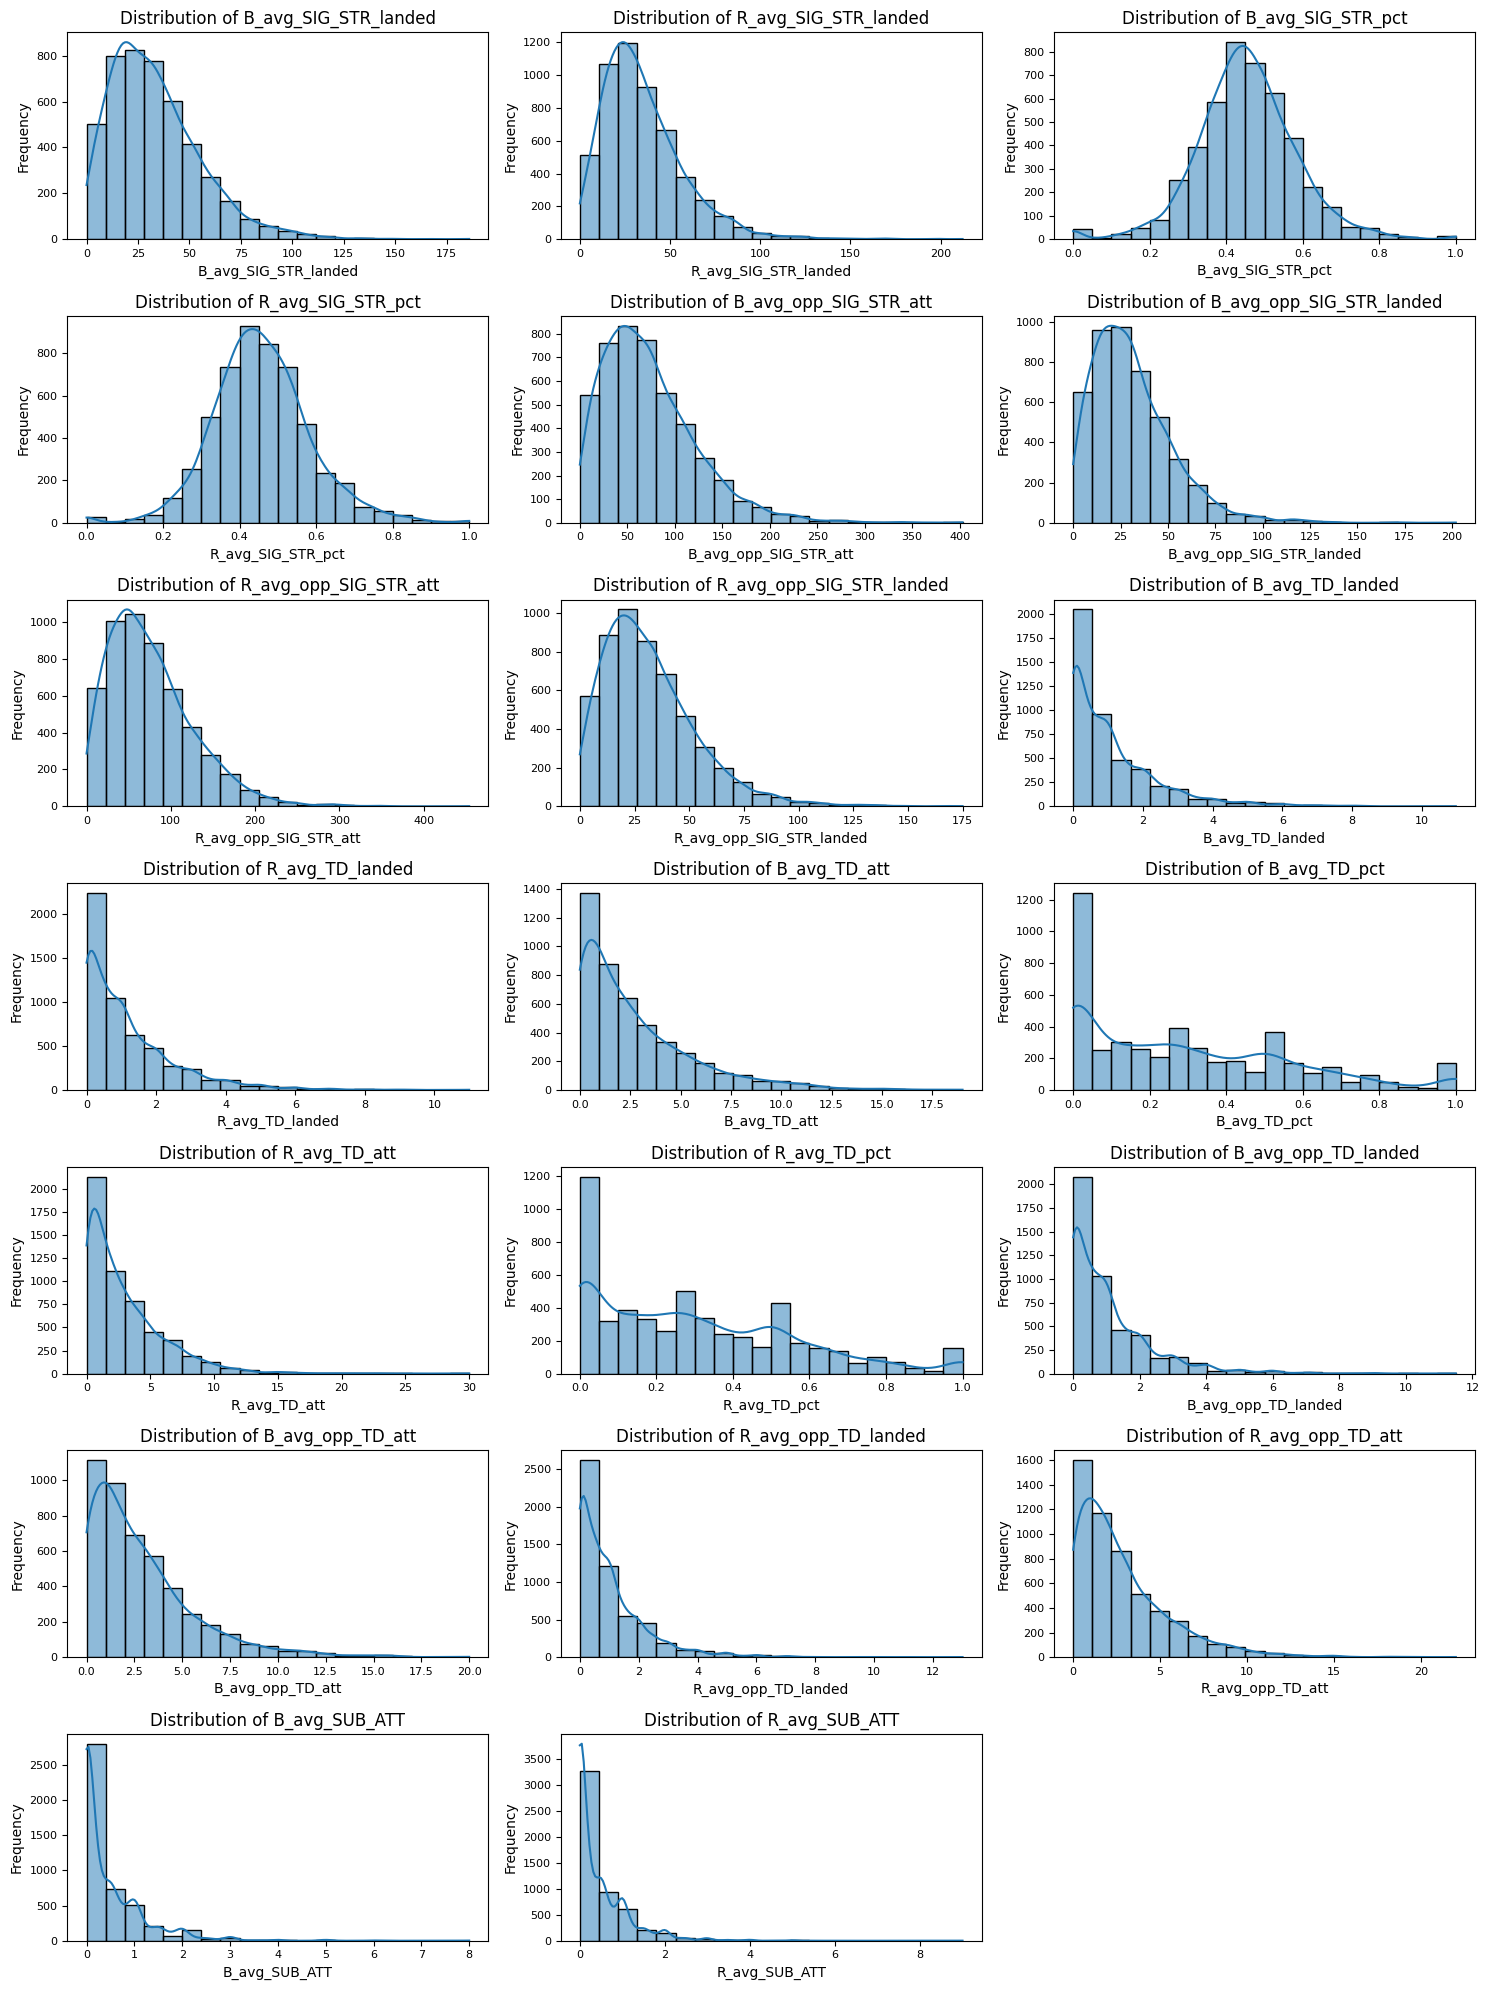

In [43]:
columns_to_plot = ['B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct',
                   'R_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
                   'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'B_avg_TD_landed',
                   'R_avg_TD_landed', 'B_avg_TD_att', 'B_avg_TD_pct', 'R_avg_TD_att',
                   'R_avg_TD_pct', 'B_avg_opp_TD_landed', 'B_avg_opp_TD_att',
                   'R_avg_opp_TD_landed', 'R_avg_opp_TD_att', 'B_avg_SUB_ATT', 'R_avg_SUB_ATT']

# Set up the figure size
plt.figure(figsize=(15, 20))

# Loop through each column and create a subplot for each
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(7, 3, i)  # Create a subplot grid, 7 rows and 3 columns
    sns.histplot(data=data_selected_3, x=col, kde=True, bins=20)  # Add KDE for smooth density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [44]:
# copy data to impute perfomance matrces uning mean meadian
data_selected_4 = data_selected_3.copy()
data_selected_4.shape

(6000, 31)

In [45]:
# Impute using median for skewed data
columns_to_impute_median = ['B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att',
                            'B_avg_opp_SIG_STR_landed', 'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed',
                            'B_avg_TD_landed', 'R_avg_TD_landed', 'B_avg_TD_att', 'R_avg_TD_att',
                            'B_avg_opp_TD_landed', 'B_avg_opp_TD_att', 'R_avg_opp_TD_landed',
                            'R_avg_opp_TD_att', 'B_avg_SUB_ATT', 'R_avg_SUB_ATT']

# Impute using mean for normally distributed data
columns_to_impute_mean = ['B_avg_SIG_STR_pct' ,'R_avg_SIG_STR_pct']

# Impute using median for percentage columns
columns_to_impute_percentage_median = [ 'B_avg_TD_pct', 'R_avg_TD_pct']

# Apply the median imputation
for col in columns_to_impute_median:
    data_selected_4[col].fillna(data_selected_4[col].median(), inplace=True)

# Apply the mean imputation
for col in columns_to_impute_mean:
    data_selected_4[col].fillna(data_selected_4[col].mean(), inplace=True)

# Apply the median imputation for percentage columns
for col in columns_to_impute_percentage_median:
    data_selected_4[col].fillna(data_selected_4[col].median(), inplace=True)


<ipython-input-45-0a43b80cf9ee>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_selected_4[col].fillna(data_selected_4[col].median(), inplace=True)
<ipython-input-45-0a43b80cf9ee>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

### Evaluating Distribution Changes Post-Imputation

Following the imputation of missing values, we re-evaluated the distributions of the performance metrics to ensure that the imputation process did not introduce significant alterations. However, we observed notable changes in the distributions, indicating that the initial imputation method may have influenced the data characteristics adversely. To address this issue, we employed K-Nearest Neighbors (KNN) imputation, a more sophisticated technique that considers the values of neighboring observations. This approach is expected to preserve the integrity of the distributions better and provide more reliable estimates for the missing values.

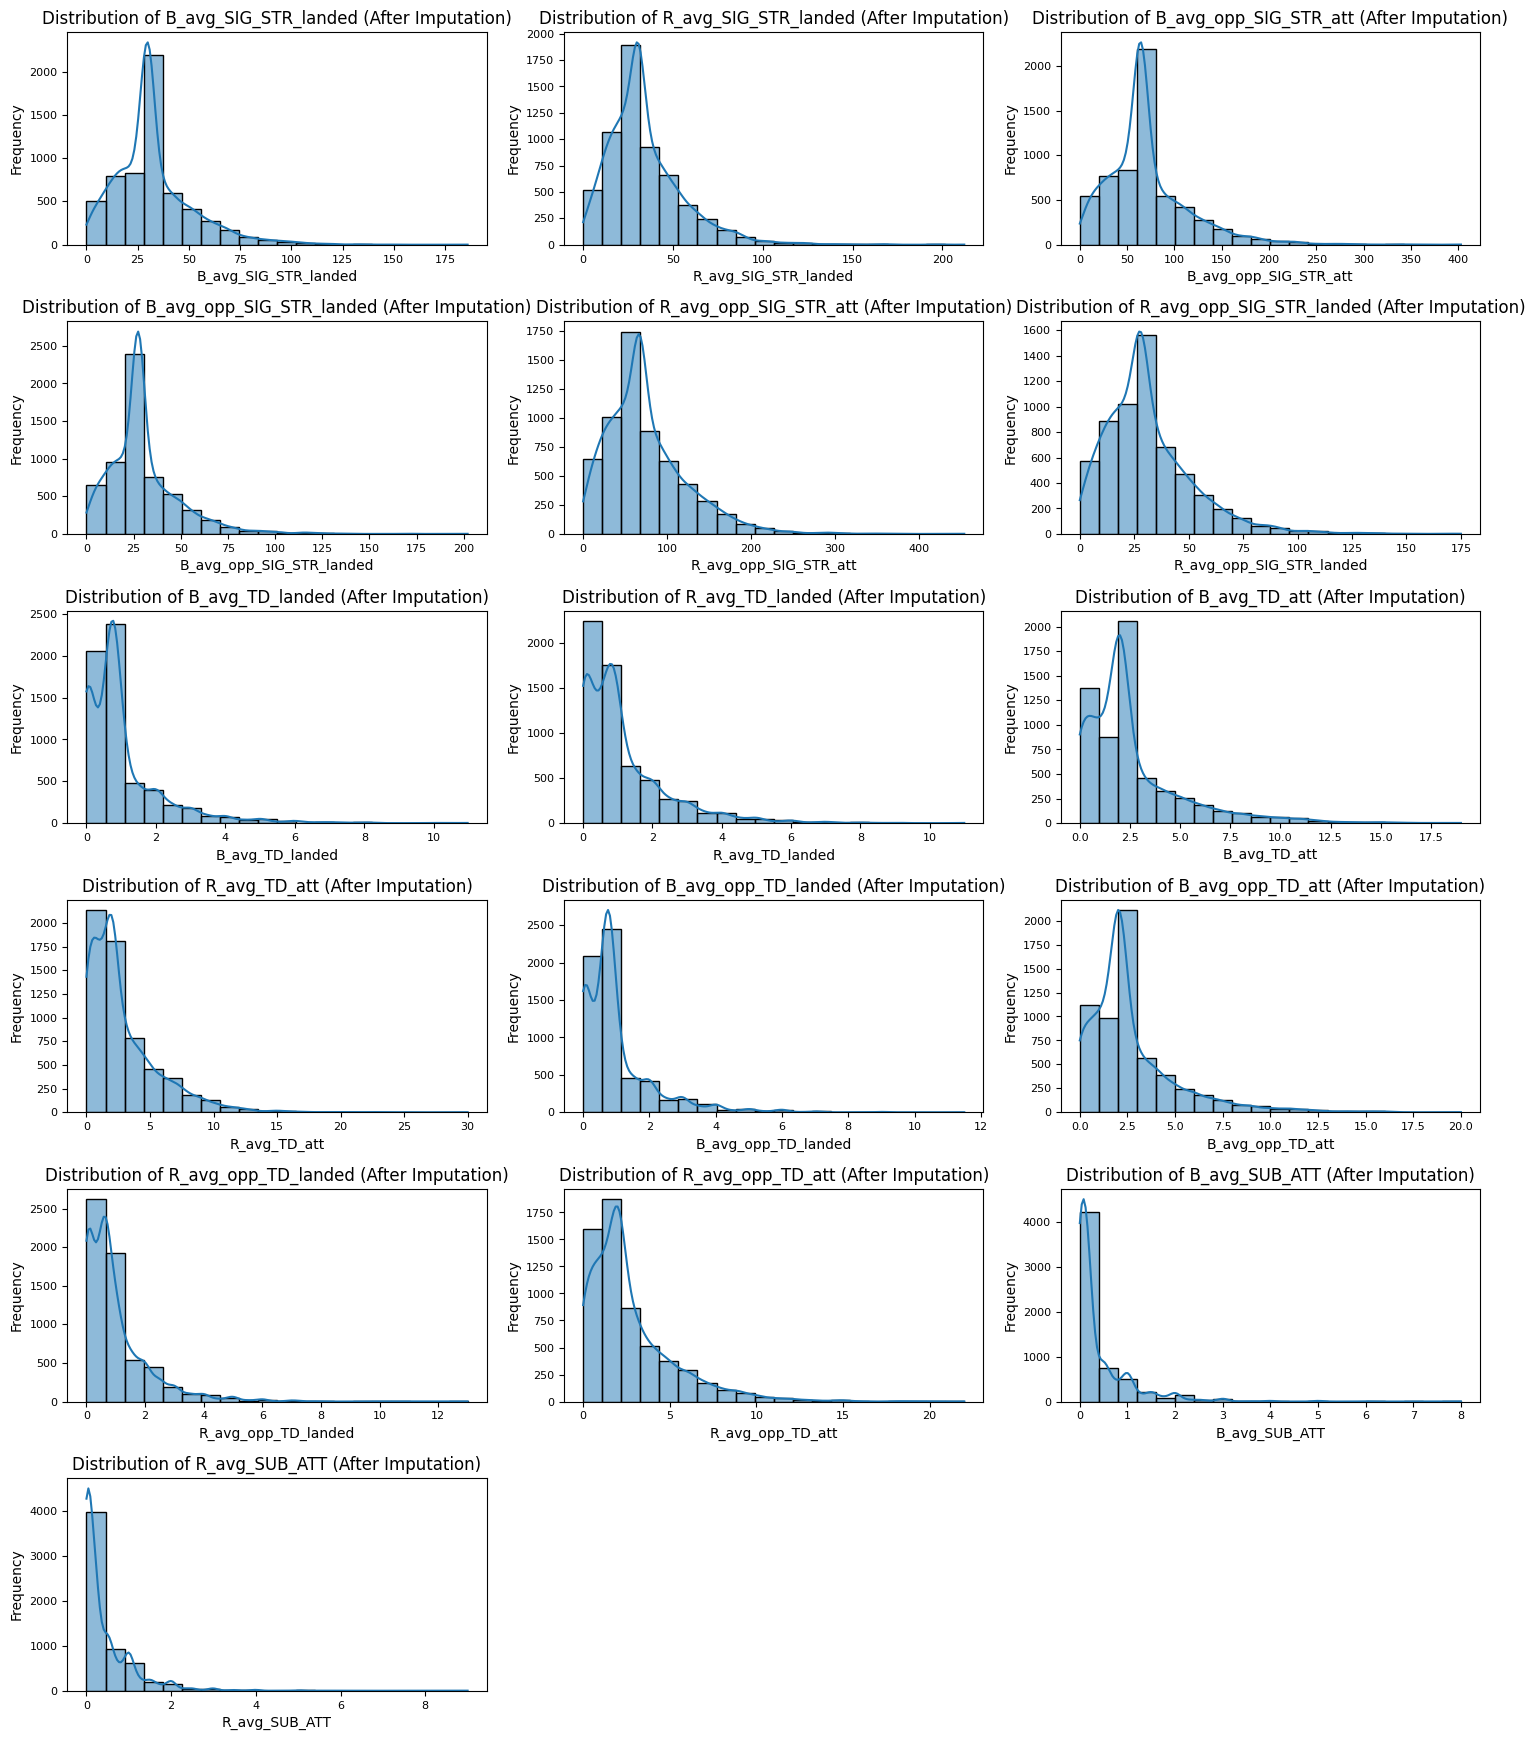

In [46]:
# Recheck the distributions after imputation
plt.figure(figsize=(15, 20))

for i, col in enumerate(columns_to_impute_median, 1):
    plt.subplot(7, 3, i)
    sns.histplot(data=data_selected_4, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col} (After Imputation)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Implementation of KNN Imputation

To address the observed changes in distributions after the initial imputation, we employed K-Nearest Neighbors (KNN) imputation. This method utilizes the values of the nearest neighbors to estimate the missing values, allowing for a more context-aware filling process. By considering the characteristics of similar observations, KNN imputation aims to maintain the underlying data distribution and relationships within the dataset, thereby enhancing the overall quality and reliability of the imputed values.

### Scaling Attributes with Min-Max Scaler Before KNN Imputation


Prior to implementing K-Nearest Neighbors (KNN) imputation, we scaled the attributes using the Min-Max scaler. This scaling technique transforms the feature values into a specified range, typically between 0 and 1. By normalizing the data, we ensure that each attribute contributes equally to the distance calculations used in KNN. This is particularly important, as KNN relies on the proximity of data points; unscaled features could disproportionately influence the imputation results. Consequently, scaling enhances the effectiveness of KNN by preserving the relative relationships among the data points.

In [47]:
# create copy of previous data frame of knn imputation
data_selected_5 = data_selected_3.copy()
data_selected_5.shape

(6000, 31)

In [48]:
# Select the columns
columns_to_impute = ['B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct',
                     'R_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
                     'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'B_avg_TD_landed',
                     'R_avg_TD_landed', 'B_avg_TD_att', 'B_avg_TD_pct', 'R_avg_TD_att',
                     'R_avg_TD_pct', 'B_avg_opp_TD_landed', 'B_avg_opp_TD_att',
                     'R_avg_opp_TD_landed', 'R_avg_opp_TD_att', 'B_avg_SUB_ATT', 'R_avg_SUB_ATT']

# Standardize the columns before KNN imputation
scaler_for_kmeans = MinMaxScaler()

# Fit the scaler and transform the columns that need imputation
scaler_for_kmeans.fit(data_selected_5[columns_to_impute])
data_selected_5[columns_to_impute] = scaler_for_kmeans.transform(data_selected_5[columns_to_impute])

In [49]:
# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer only to the selected columns
data_selected_5[columns_to_impute] = knn_imputer.fit_transform(data_selected_5[columns_to_impute])

# Check for any remaining missing values
print(data_selected_5.isnull().sum())

data_selected_5[columns_to_impute] = scaler_for_kmeans.inverse_transform(data_selected_5[columns_to_impute])


B_Height_cms                  0
R_Height_cms                  0
B_Weight_lbs                  0
R_Weight_lbs                  0
B_Reach_cms                   0
R_Reach_cms                   0
B_Stance                     57
R_Stance                     26
B_age                       163
R_age                        58
B_avg_SIG_STR_landed          0
R_avg_SIG_STR_landed          0
B_avg_SIG_STR_pct             0
R_avg_SIG_STR_pct             0
B_avg_opp_SIG_STR_att         0
B_avg_opp_SIG_STR_landed      0
R_avg_opp_SIG_STR_att         0
R_avg_opp_SIG_STR_landed      0
B_avg_TD_landed               0
R_avg_TD_landed               0
B_avg_TD_att                  0
B_avg_TD_pct                  0
R_avg_TD_att                  0
R_avg_TD_pct                  0
B_avg_opp_TD_landed           0
B_avg_opp_TD_att              0
R_avg_opp_TD_landed           0
R_avg_opp_TD_att              0
B_avg_SUB_ATT                 0
R_avg_SUB_ATT                 0
Winner                        0
dtype: i

### Verification of Data Distribution Post-KNN Imputation

Our analysis revealed that the distributions remained largely consistent, indicating that KNN imputation effectively filled in missing values without introducing significant bias. Maintaining the integrity of data distributions is vital for subsequent modeling, as substantial changes could adversely impact model performance. Thus, the stability of distributions post-imputation validates the suitability of the KNN method for handling missing values in this context.

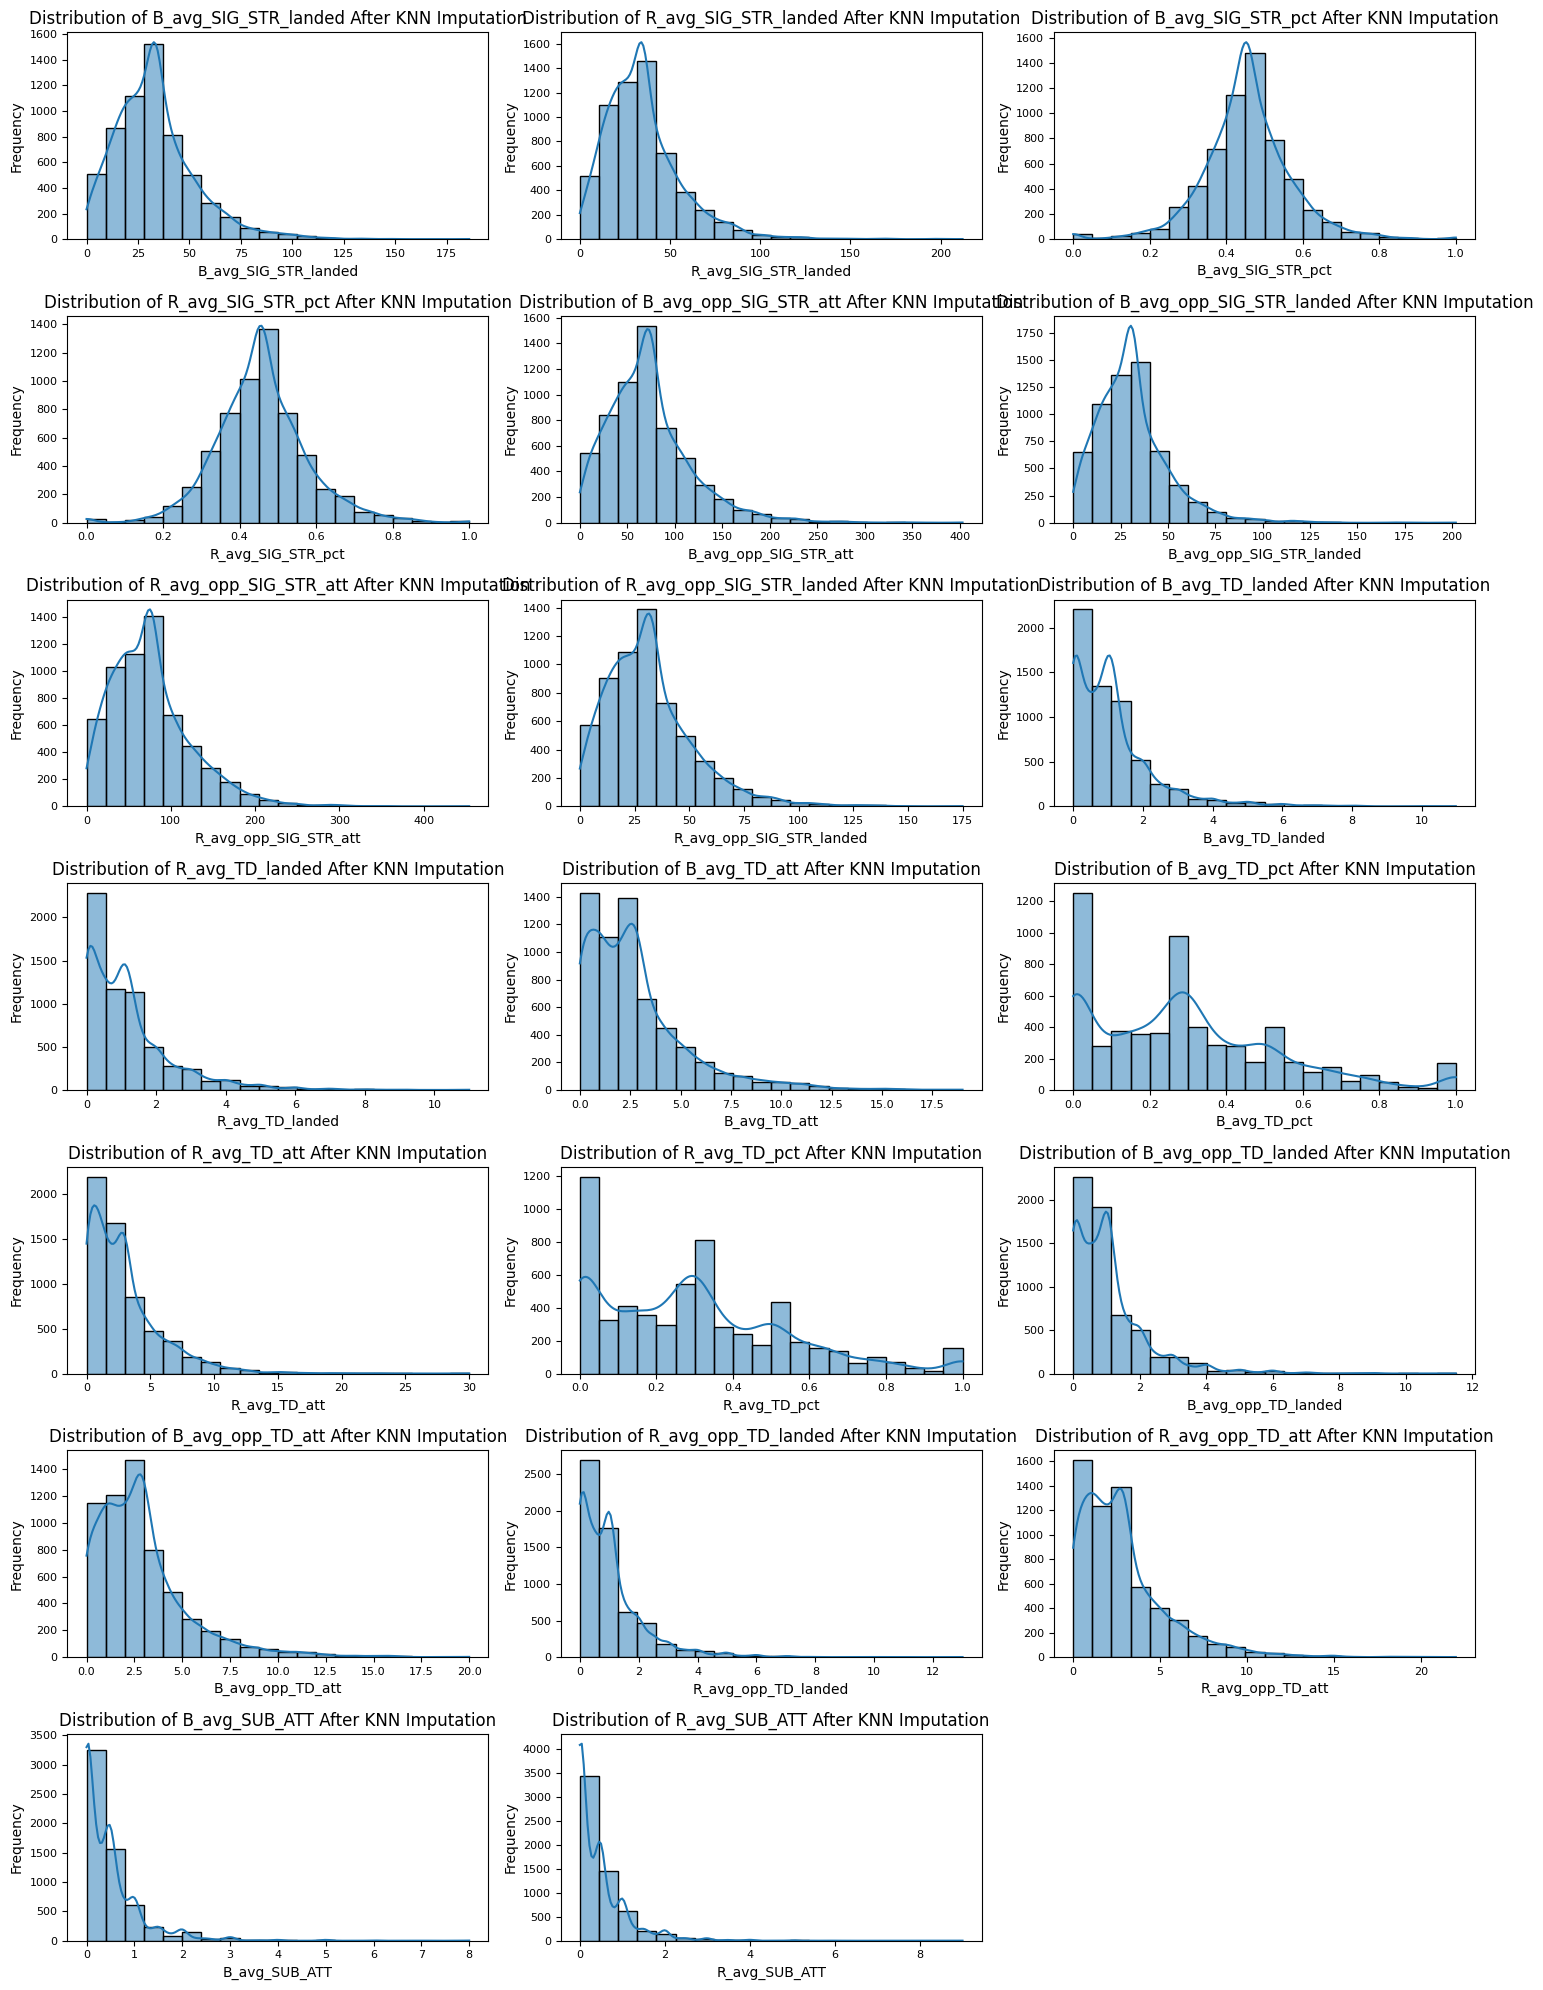

In [50]:
# Plot distributions again to see if they were preserved
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
for i, col in enumerate(columns_to_impute, 1):
    plt.subplot(7, 3, i)
    sns.histplot(data=data_selected_5, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col} After KNN Imputation')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [51]:
print(data_selected_5.isnull().sum())

B_Height_cms                  0
R_Height_cms                  0
B_Weight_lbs                  0
R_Weight_lbs                  0
B_Reach_cms                   0
R_Reach_cms                   0
B_Stance                     57
R_Stance                     26
B_age                       163
R_age                        58
B_avg_SIG_STR_landed          0
R_avg_SIG_STR_landed          0
B_avg_SIG_STR_pct             0
R_avg_SIG_STR_pct             0
B_avg_opp_SIG_STR_att         0
B_avg_opp_SIG_STR_landed      0
R_avg_opp_SIG_STR_att         0
R_avg_opp_SIG_STR_landed      0
B_avg_TD_landed               0
R_avg_TD_landed               0
B_avg_TD_att                  0
B_avg_TD_pct                  0
R_avg_TD_att                  0
R_avg_TD_pct                  0
B_avg_opp_TD_landed           0
B_avg_opp_TD_att              0
R_avg_opp_TD_landed           0
R_avg_opp_TD_att              0
B_avg_SUB_ATT                 0
R_avg_SUB_ATT                 0
Winner                        0
dtype: i

### Imputation of Missing Values in Age Using KNN

We employed K-Nearest Neighbors (KNN) for age imputation due to its ability to leverage relationships between features to predict missing values. KNN assumes that similar observations have similar values, making it effective for datasets where attributes like height, weight, and reach are correlated with age. This method preserves the underlying distribution and relationships within the data, enhancing the quality of the dataset for more accurate predictions. Additionally, as a non-parametric approach, KNN does not assume a specific data distribution, making it suitable for real-world scenarios.

In [52]:
data_selected_6 = data_selected_5.copy()

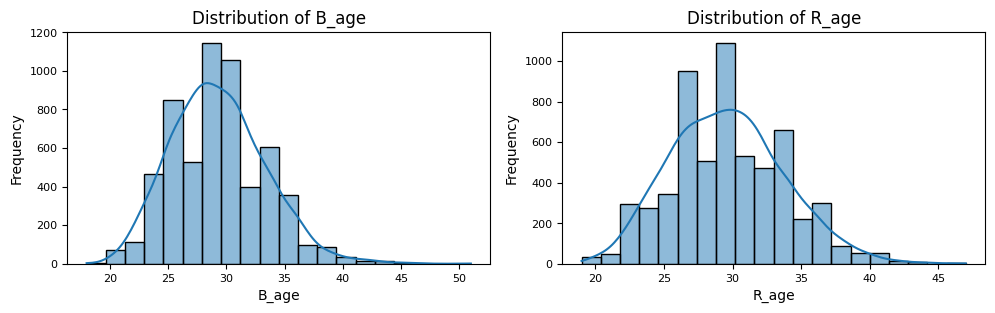

In [53]:
columns_to_impute = ['B_age','R_age']

plt.figure(figsize=(15, 20))

for i, col in enumerate(columns_to_impute, 1):
    plt.subplot(7, 3, i)
    sns.histplot(data=data_selected_6, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [54]:
# Select relevant columns for KNN Imputation
columns_to_use_for_knn = ['B_Height_cms', 'R_Height_cms', 'B_Weight_lbs',
                          'R_Weight_lbs', 'B_Reach_cms', 'R_Reach_cms',
                          'B_age', 'R_age']

# Filter the dataset to include only these columns
df_knn = data_selected_6[columns_to_use_for_knn]

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=columns_to_use_for_knn)

# Replace the original age columns with the imputed ones
data_selected_6['B_age'] = df_knn_imputed['B_age']
data_selected_6['R_age'] = df_knn_imputed['R_age']

# Optional: Check if there are any remaining missing values
print(data_selected_6[['B_age', 'R_age']].isnull().sum())

B_age    10
R_age    10
dtype: int64


### Handling Remaining Missing Values in Age Columns

KNN imputation may fail to estimate certain values in the B_age and R_age columns if there are not enough similar data points nearby, which can occur in sparse datasets. To address the remaining missing values, we used median imputation because it is less affected by outliers compared to the mean. The median provides a more accurate representation of the central age distribution, ensuring that the imputed values maintain the dataset's integrity.

In [55]:
# Use median imputation for any remaining missing values
data_selected_6['B_age'].fillna(data_selected_6['B_age'].median(), inplace=True)
data_selected_6['R_age'].fillna(data_selected_6['R_age'].median(), inplace=True)

<ipython-input-55-bef0d5c6a261>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_selected_6['B_age'].fillna(data_selected_6['B_age'].median(), inplace=True)
<ipython-input-55-bef0d5c6a261>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

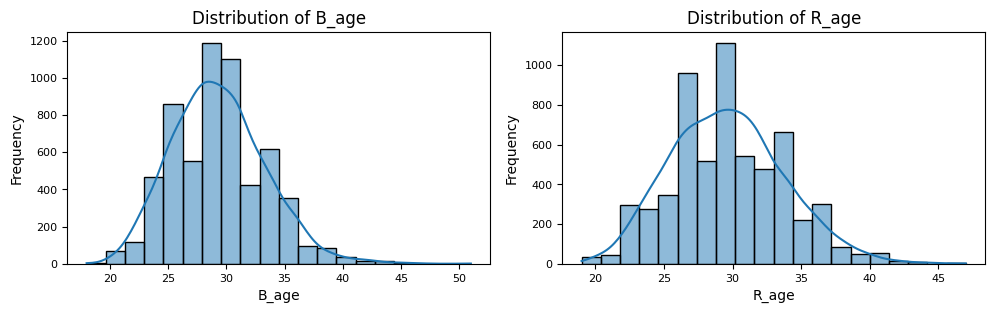

In [56]:
columns_to_impute = ['B_age','R_age']
plt.figure(figsize=(15, 20))

for i, col in enumerate(columns_to_impute, 1):
    plt.subplot(7, 3, i)
    sns.histplot(data=data_selected_6, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [57]:
print(data_selected_6.isnull().sum())

B_Height_cms                 0
R_Height_cms                 0
B_Weight_lbs                 0
R_Weight_lbs                 0
B_Reach_cms                  0
R_Reach_cms                  0
B_Stance                    57
R_Stance                    26
B_age                        0
R_age                        0
B_avg_SIG_STR_landed         0
R_avg_SIG_STR_landed         0
B_avg_SIG_STR_pct            0
R_avg_SIG_STR_pct            0
B_avg_opp_SIG_STR_att        0
B_avg_opp_SIG_STR_landed     0
R_avg_opp_SIG_STR_att        0
R_avg_opp_SIG_STR_landed     0
B_avg_TD_landed              0
R_avg_TD_landed              0
B_avg_TD_att                 0
B_avg_TD_pct                 0
R_avg_TD_att                 0
R_avg_TD_pct                 0
B_avg_opp_TD_landed          0
B_avg_opp_TD_att             0
R_avg_opp_TD_landed          0
R_avg_opp_TD_att             0
B_avg_SUB_ATT                0
R_avg_SUB_ATT                0
Winner                       0
dtype: int64


### Mode Imputation for Handling Null Values in Stance Column

In our UFC fight analysis, we faced null values in the B_Stance and R_Stance columns, where the category "Orthodox" was overwhelmingly common, with frequencies of 4,527 and 4,530, respectively. We chose mode imputation for several reasons. This method is straightforward and efficient, allowing for quick handling of missing data. By filling null values with the most frequent category, we preserved the underlying distribution of the dataset while minimizing bias. Additionally, mode imputation retained relevant information by reflecting the stance adopted by the majority of fighters, ensuring that the integrity of the dataset was maintained in our analysis.

In [58]:
data_selected_7 = data_selected_6.copy()

In [59]:
data_selected_7.B_Stance.describe()

count         5943
unique           5
top       Orthodox
freq          4527
Name: B_Stance, dtype: object

In [60]:
data_selected_7.R_Stance.describe()

count         5974
unique           5
top       Orthodox
freq          4530
Name: R_Stance, dtype: object

In [61]:
# Fill missing values in B_Stance and R_Stance with the most frequent value (mode)
data_selected_7['B_Stance'].fillna(data_selected_7['B_Stance'].mode()[0], inplace=True)
data_selected_7['R_Stance'].fillna(data_selected_7['R_Stance'].mode()[0], inplace=True)
print(data_selected_7.isnull().sum())

B_Height_cms                0
R_Height_cms                0
B_Weight_lbs                0
R_Weight_lbs                0
B_Reach_cms                 0
R_Reach_cms                 0
B_Stance                    0
R_Stance                    0
B_age                       0
R_age                       0
B_avg_SIG_STR_landed        0
R_avg_SIG_STR_landed        0
B_avg_SIG_STR_pct           0
R_avg_SIG_STR_pct           0
B_avg_opp_SIG_STR_att       0
B_avg_opp_SIG_STR_landed    0
R_avg_opp_SIG_STR_att       0
R_avg_opp_SIG_STR_landed    0
B_avg_TD_landed             0
R_avg_TD_landed             0
B_avg_TD_att                0
B_avg_TD_pct                0
R_avg_TD_att                0
R_avg_TD_pct                0
B_avg_opp_TD_landed         0
B_avg_opp_TD_att            0
R_avg_opp_TD_landed         0
R_avg_opp_TD_att            0
B_avg_SUB_ATT               0
R_avg_SUB_ATT               0
Winner                      0
dtype: int64


<ipython-input-61-d2970a40deea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_selected_7['B_Stance'].fillna(data_selected_7['B_Stance'].mode()[0], inplace=True)
<ipython-input-61-d2970a40deea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [62]:
data_selected_7.describe()

B_Height_cms  R_Height_cms  B_Weight_lbs  R_Weight_lbs  B_Reach_cms  \
count   6000.000000   6000.000000   6000.000000   6000.000000  6000.000000   
mean     178.947233    178.986180    170.583667    170.649833   183.533910   
std        8.708764      8.816003     36.884180     35.728765    10.176941   
min      152.400000    152.400000    115.000000    115.000000   147.320000   
25%      172.720000    172.720000    145.000000    145.000000   177.800000   
50%      180.340000    180.340000    170.000000    170.000000   182.880000   
75%      185.420000    185.420000    185.000000    185.000000   190.500000   
max      210.820000    210.820000    770.000000    345.000000   214.781254   

       R_Reach_cms        B_age        R_age  B_avg_SIG_STR_landed  \
count  6000.000000  6000.000000  6000.000000           6000.000000   
mean    183.759278    29.300533    29.601767             33.224296   
std      10.470540     4.019959     4.150627             19.719197   
min     152.400000    18.000000    19.000000              0.000000   
25%     177.800000    26.000000    27.000000             19.859231   
50%     185.105216    29.000000    29.000000             32.000000   
75%     190.500000    32.000000    32.000000             42.142400   
max     214.781254    51.000000    47.000000            186.000000   

       R_avg_SIG_STR_landed  ...  B_avg_TD_att  B_avg_TD_pct  R_avg_TD_att  \
count           6000.000000  ...   6000.000000   6000.000000   6000.000000   
mean              34.781963  ...      2.721967      0.293921      2.931699   
std               21.331818  ...      2.529652      0.244453      2.838960   
min                0.000000  ...      0.000000      0.000000      0.000000   
25%               20.312500  ...      1.000000      0.093457      0.937500   
50%               32.750000  ...      2.250000      0.278750      2.288086   
75%               44.125000  ...      3.578125      0.436438      4.000000   
max              212.142956  ...     19.000000      1.000000     30.000000   

       R_avg_TD_pct  B_avg_opp_TD_landed  B_avg_opp_TD_att  \
count   6000.000000          6000.000000       6000.000000   
mean       0.300569             1.072277          2.856965   
std        0.247114             1.126939          2.446920   
min        0.000000             0.000000          0.000000   
25%        0.094811             0.265268          1.062500   
50%        0.285000             0.900000          2.500000   
75%        0.456572             1.400586          3.701951   
max        1.000000            11.500000         20.000000   

       R_avg_opp_TD_landed  R_avg_opp_TD_att  B_avg_SUB_ATT  R_avg_SUB_ATT  
count          6000.000000       6000.000000    6000.000000    6000.000000  
mean              1.020806          2.826428       0.479988       0.461897  
std               1.113770          2.494092       0.646759       0.632302  
min               0.000000          0.000000       0.000000       0.000000  
25%               0.232956          1.000000       0.000000       0.000000  
50%               0.809570          2.362971       0.309180       0.250382  
75%               1.343750          3.750000       0.625065       0.625000  
max              13.000000         22.000000       8.000000       9.000000  

[8 rows x 28 columns]

## Min-Max Scaling for Preprocessing Data Before Model Training

Prior to training our predictive model for UFC fight outcomes, we applied Min-Max scaling to the following features: B_Height_cms, R_Height_cms, B_Weight_lbs, R_Weight_lbs, B_Reach_cms, R_Reach_cms, B_age, R_age, B_avg_SIG_STR_landed, R_avg_SIG_STR_landed, B_avg_SIG_STR_pct, R_avg_SIG_STR_pct, B_avg_opp_SIG_STR_att, B_avg_opp_SIG_STR_landed, R_avg_opp_SIG_STR_att, R_avg_opp_SIG_STR_landed, B_avg_TD_landed, R_avg_TD_landed, B_avg_TD_att, and B_avg_TD_pct.

Min-Max scaling was chosen due to its ability to transform features into a consistent range, typically between 0 and 1. This is crucial for machine learning algorithms that rely on distance calculations, as it ensures that all features contribute equally to the model's training process. By normalizing the data, we enhance the model's convergence speed and improve its performance, as it prevents features with larger ranges from disproportionately influencing the results. Ultimately, Min-Max scaling prepares the dataset for effective training and helps achieve better predictive accuracy in determining fight outcomes.

In [63]:
data_selected_8 = data_selected_7.copy()

In [64]:
# Select columns to scale
columns_to_scale = [
       'B_Height_cms', 'R_Height_cms', 'B_Weight_lbs', 'R_Weight_lbs',
       'B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age', 'B_avg_SIG_STR_landed',
       'R_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'R_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
       'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'B_avg_TD_landed',
       'R_avg_TD_landed', 'B_avg_TD_att', 'B_avg_TD_pct', 'R_avg_TD_att',
       'R_avg_TD_pct', 'B_avg_opp_TD_landed', 'B_avg_opp_TD_att',
       'R_avg_opp_TD_landed', 'R_avg_opp_TD_att', 'B_avg_SUB_ATT',
       'R_avg_SUB_ATT'
]

# Standardization
# scaler = StandardScaler()
# data_selected_7[columns_to_scale] = scaler.fit_transform(data_selected_7[columns_to_scale])

# Min-Max Scaling
scaler_perfomance_mat = MinMaxScaler()
scaler_perfomance_mat.fit(data_selected_8[columns_to_scale])
data_selected_8[columns_to_scale] = scaler_perfomance_mat.transform(data_selected_8[columns_to_scale])
data_selected_8.sample(3)

B_Height_cms  R_Height_cms  B_Weight_lbs  R_Weight_lbs  B_Reach_cms  \
2090      0.217391      0.217391      0.015267      0.043478     0.376512   
4421      0.130435      0.391304      0.015267      0.086957     0.225907   
3490      0.782609      0.652174      0.213740      0.586957     0.790676   

      R_Reach_cms  B_Stance  R_Stance     B_age     R_age  ...  B_avg_TD_pct  \
2090     0.162869  Orthodox  Orthodox  0.303030  0.214286  ...      0.116000   
4421     0.407174  Southpaw  Orthodox  0.515152  0.250000  ...      0.000000   
3490     0.732912  Orthodox  Orthodox  0.393939  0.607143  ...      0.083281   

      R_avg_TD_att  R_avg_TD_pct  B_avg_opp_TD_landed  B_avg_opp_TD_att  \
2090      0.050000       0.04000             0.195652          0.251250   
4421      0.166667       1.00000             0.000000          0.050000   
3490      0.011458       0.21875             0.000000          0.063281   

      R_avg_opp_TD_landed  R_avg_opp_TD_att  B_avg_SUB_ATT  R_avg_SUB_ATT  \
2090             0.096154          0.147727       0.040625       0.000000   
4421             0.000000          0.000000       0.000000       0.333333   
3490             0.033654          0.052557       0.008789       0.052083   

      Winner  
2090    Blue  
4421     Red  
3490    Blue  

[3 rows x 31 columns]

In [65]:
print(data_selected_8.dtypes)

B_Height_cms                float64
R_Height_cms                float64
B_Weight_lbs                float64
R_Weight_lbs                float64
B_Reach_cms                 float64
R_Reach_cms                 float64
B_Stance                     object
R_Stance                     object
B_age                       float64
R_age                       float64
B_avg_SIG_STR_landed        float64
R_avg_SIG_STR_landed        float64
B_avg_SIG_STR_pct           float64
R_avg_SIG_STR_pct           float64
B_avg_opp_SIG_STR_att       float64
B_avg_opp_SIG_STR_landed    float64
R_avg_opp_SIG_STR_att       float64
R_avg_opp_SIG_STR_landed    float64
B_avg_TD_landed             float64
R_avg_TD_landed             float64
B_avg_TD_att                float64
B_avg_TD_pct                float64
R_avg_TD_att                float64
R_avg_TD_pct                float64
B_avg_opp_TD_landed         float64
B_avg_opp_TD_att            float64
R_avg_opp_TD_landed         float64
R_avg_opp_TD_att            

## One-Hot Encoding for Categorical Variables

After scaling the numerical features, we applied one-hot encoding to the B_Stance and R_Stance columns to convert these categorical variables into a numerical format suitable for model training. One-hot encoding generates binary (0 or 1) columns for each category, allowing the model to interpret the categorical data effectively.

To avoid the dummy variable trap, we dropped one of the generated dummy columns. This practice helps prevent multicollinearity, ensuring that the model does not receive redundant information from correlated features. By implementing one-hot encoding in this manner, we enhance the model's ability to learn patterns associated with different stances without compromising the integrity of the dataset or the accuracy of the predictions.

In [66]:
data_selected_9 = data_selected_8.copy()

In [67]:
winner_counts = data_selected_9['Winner'].value_counts()
print(winner_counts)

Winner
Red     3968
Blue    1922
Draw     110
Name: count, dtype: int64


In [68]:
data_selected_9 = pd.get_dummies(data_selected_9,columns=['B_Stance','R_Stance'],drop_first=True)
data_selected_9 = pd.get_dummies(data_selected_9,columns=['Winner'])
data_selected_9.sample()
print(data_selected_9.shape)

(6000, 39)


# Application of Principal Component Analysis (PCA) in UFC Fight Outcome Prediction

In analyzing UFC fight data, we discovered several highly correlated attributes, such as R_avg_LEG_landed and R_avg_LEG_att, with correlation coefficients above 0.97. This multicollinearity can hinder model performance and complicate interpretation.

To address this, we applied Principal Component Analysis (PCA) for several key reasons:

Multicollinearity Reduction: PCA transforms correlated variables into uncorrelated components, simplifying the dataset and mitigating overfitting.

Efficiency Improvement: Reducing dimensionality speeds up training and decreases computational complexity.

Variance Preservation: PCA retains the most significant components, ensuring that essential information is maintained while reducing noise.

Enhanced Interpretability: Fewer dimensions make it easier to understand relationships among variables.

By using PCA, we aimed to improve model performance and ensure robust predictions in UFC fight outcome analysis.

In [69]:
data_selected_10 = data_selected_9.copy()
x_to_pca = data_selected_10.drop(columns=['Winner_Blue','Winner_Draw','Winner_Red'])  # Features (all columns except 'Winner')
y = data_selected_10[['Winner_Blue','Winner_Draw','Winner_Red']]  # Target (the winner of the fight)
x_to_pca

B_Height_cms  R_Height_cms  B_Weight_lbs  R_Weight_lbs  B_Reach_cms  \
0         0.217391      0.304348      0.030534      0.086957     0.338861   
1         0.608696      0.521739      0.137405      0.304348     0.677722   
2         0.608696      0.608696      0.192366      0.647826     0.640071   
3         0.000000      0.130435      0.000000      0.000000     0.112954   
4         0.478261      0.260870      0.030534      0.086957     0.527117   
...            ...           ...           ...           ...          ...   
6006      0.521739      0.478261      0.145038      0.326087     0.600093   
6007      0.347826      0.652174      0.187786      0.630435     0.440130   
6008      0.608696      0.434783      0.198473      0.239130     0.680075   
6009      0.739130      0.521739      0.244275      0.413043     0.800047   
6011      0.521739      0.434783      0.091603      0.413043     0.600093   

      R_Reach_cms     B_age     R_age  B_avg_SIG_STR_landed  \
0        0.407174  0.393939  0.285714              0.107527   
1        0.570043  0.424242  0.321429              0.188172   
2        0.610760  0.424242  0.321429              0.153684   
3        0.122152  0.303030  0.214286              0.179269   
4        0.325739  0.333333  0.857143              0.311492   
...           ...       ...       ...                   ...   
6006     0.524280  0.333333  0.357143              0.179269   
6007     0.697269  0.333333  0.357143              0.179269   
6008     0.481032  0.333333  0.357143              0.179269   
6009     0.567527  0.333333  0.357143              0.179269   
6011     0.481032  0.333333  0.357143              0.179269   

      R_avg_SIG_STR_landed  ...  B_avg_SUB_ATT  R_avg_SUB_ATT  \
0                 0.080135  ...       0.062500       0.000000   
1                 0.203430  ...       0.187500       0.027778   
2                 0.143182  ...       0.042822       0.000000   
3                 0.164140  ...       0.059887       0.051516   
4                 0.209115  ...       0.015625       0.025716   
...                    ...  ...            ...            ...   
6006              0.164140  ...       0.059887       0.051516   
6007              0.164140  ...       0.059887       0.051516   
6008              0.164140  ...       0.059887       0.051516   
6009              0.164140  ...       0.059887       0.051516   
6011              0.164140  ...       0.059887       0.051516   

      B_Stance_Orthodox  B_Stance_Sideways  B_Stance_Southpaw  \
0                  True              False              False   
1                  True              False              False   
2                  True              False              False   
3                 False              False               True   
4                  True              False              False   
...                 ...                ...                ...   
6006               True              False              False   
6007               True              False              False   
6008               True              False              False   
6009               True              False              False   
6011               True              False              False   

      B_Stance_Switch  R_Stance_Orthodox  R_Stance_Sideways  \
0               False               True              False   
1               False               True              False   
2               False              False              False   
3               False              False              False   
4               False               True              False   
...               ...                ...                ...   
6006            False              False              False   
6007            False              False              False   
6008            False              False              False   
6009            False               True              False   
6011            False               True              False   

     

In [70]:
pca = PCA(.95)

In [71]:
pca.fit(x_to_pca)
x_pca = pca.transform(x_to_pca)

In [72]:
x_pca.shape

(6000, 17)

In [73]:
x_to_pca.shape

(6000, 36)

In [74]:
x_pca

array([[ 0.4230033 ,  0.13718278, -0.28374933, ...,  0.23123716,
         0.11853843, -0.09721573],
       [ 0.41950975,  0.12811224,  0.22604549, ...,  0.05652643,
        -0.06546169,  0.12482039],
       [-0.83396863,  0.78148953,  0.46325773, ...,  0.0711653 ,
         0.04825424,  0.03769263],
       ...,
       [-0.83646819,  0.77220357,  0.09909252, ..., -0.07947702,
         0.02625418,  0.11127899],
       [ 0.41941549,  0.13225039,  0.36630381, ..., -0.12236664,
         0.03607997,  0.14252324],
       [ 0.42251385,  0.13084954,  0.10600003, ..., -0.04175324,
         0.00699515,  0.0530184 ]])

In [75]:
pca.explained_variance_ratio_

array([0.26957587, 0.25413266, 0.08767583, 0.06194212, 0.05026074,
       0.04498564, 0.03824602, 0.02635122, 0.02023004, 0.01900939,
       0.01724445, 0.01363568, 0.01319214, 0.01183532, 0.01103321,
       0.00997893, 0.00934983])

In [76]:
pca.explained_variance_ratio_.sum()

0.9586790868771239

In [77]:
pca.n_components_

17

# Model Selection and Hyperparameter Optimization for UFC Fight Outcome Prediction

In this stage of our analysis, we trained multiple machine learning models, including Random Forest, Logistic Regression, and Support Vector Classifier (SVC), to predict UFC fight outcomes. To optimize each model's performance, we employed GridSearchCV for hyperparameter tuning, allowing us to systematically search for the best configurations.

After optimizing hyperparameters, we compared the models' performance using cross-validation metrics such as accuracy, precision, recall, and F1-score. This evaluation enabled us to identify the most effective model for predicting fight outcomes, ensuring our final selection was based on robust statistical validation and empirical evidence.

In [78]:
# x = data_selected_9.drop(columns=['Winner_Blue', 'Winner_Draw', 'Winner_Red'])  # Features
y = data_selected_10[['Winner_Blue', 'Winner_Draw', 'Winner_Red']].idxmax(axis=1)  # Convert multi-target columns to single target

# Split the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=49)

# Define a dictionary of models and their hyperparameter grids
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'bootstrap': [True, False]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    }
}

from sklearn.model_selection import cross_val_score

# Track the best model and score
best_model = None
best_score = 0
best_params = None
best_model_name = None

# Train and evaluate each model
for model_name, config in models.items():
    print(f"Training {model_name}...")

    grid_search = GridSearchCV(config['model'], config['params'], cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(x_train, y_train)

    # Perform cross-validation
    cross_val_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='accuracy')
    mean_cross_val_score = cross_val_scores.mean()

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Mean cross-validation score for {model_name}: {mean_cross_val_score:.4f}\n")

    # Check if this model is the best so far based on cross-validation score
    if mean_cross_val_score > best_score:
        best_model = grid_search.best_estimator_
        best_score = mean_cross_val_score
        best_params = grid_search.best_params_
        best_model_name = model_name

# Display the best model and its parameters
print(f"Best model: {best_model_name}")
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Detailed classification report for the best model
y_pred = best_model.predict(x_test)
print(f"Classification report for {best_model_name}:")
print(classification_report(y_test, y_pred))





Training RandomForest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for RandomForest: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean cross-validation score for RandomForest: 0.6625

Training LogisticRegression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Mean cross-validation score for LogisticRegression: 0.6625

Training SVC...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean cross-validation score for SVC: 0.6569

Training KNeighbors...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNeighbors: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Mean cross-validation score for KNeighbors: 0.6215

Best model: LogisticRegression
Best parameters: {'C': 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Advanced Hyperparameter Optimization for the LogisticRegression Model

After identifying the Logistic Regression model as the most effective for predicting UFC fight outcomes, we employed advanced hyperparameter optimization techniques to enhance its performance. The dataset was preprocessed to convert multi-target columns into a single categorical target representing fight winners.

A comprehensive hyperparameter grid was established, incorporating various penalties (L1, L2, and Elastic Net), regularization strengths (C values), and the SAGA solver. Using GridSearchCV with 5-fold cross-validation, we systematically explored the hyperparameter space to identify the optimal configuration.

This rigorous approach highlights the significance of hyperparameter tuning in developing reliable predictive models in sports analytics, particularly within mixed martial arts.

In [79]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Convert multi-target columns to single target
y = data_selected_10[['Winner_Blue', 'Winner_Draw', 'Winner_Red']].idxmax(axis=1)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    x_pca, y, test_size=0.2, random_state=49
)

# Set up hyperparameter grid for Logistic Regression
param_grid = [
    {
        'penalty': ['l1', 'l2', None],  # Use None instead of 'none'
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [None],
        'multi_class': ['multinomial']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [0.0, 0.5, 1.0],
        'multi_class': ['multinomial']
    }
]

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=10000, random_state=42)

# Use GridSearchCV with 5-fold cross-validation (cv=5)
grid_search = GridSearchCV(
    estimator=logreg_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Evaluate the best model
best_logreg_model = grid_search.best_estimator_

# Predict the test set
y_pred = best_logreg_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'C': 1, 'l1_ratio': None, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 69.25%
              precision    recall  f1-score   support

 Winner_Blue       0.58      0.15      0.24       365
 Winner_Draw       0.00      0.00      0.00        20
  Winner_Red       0.70      0.95      0.81       815

    accuracy                           0.69      1200
   macro avg       0.43      0.37      0.35      1200
weighted avg       0.65      0.69      0.62      1200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

# LogisticRegression To Predict Winner

We selected the Logistic Regression model to predict the winner of UFC fights due to its several advantages. As a statistical method, it provides a clear framework for understanding the relationship between features and the target outcome, enhancing interpretability. Logistic Regression is particularly effective for binary and multi-class classification tasks, making it suitable for our needs in predicting fight outcomes (winner: Blue, Red, or Draw).

Additionally, it efficiently handles both numerical and categorical data, allowing us to incorporate a diverse feature set. The model's ability to produce probabilities for class membership aids in assessing the confidence of predictions. Its relative simplicity and speed make it a robust choice, especially in scenarios where computational efficiency is important. Overall, these characteristics position Logistic Regression as an optimal choice for accurately predicting UFC fight outcomes.

In [80]:
X = data_selected_9.drop(columns=['Winner_Blue','Winner_Draw','Winner_Red'])  # Features (all columns except 'Winner')
y = data_selected_9[['Winner_Blue','Winner_Draw','Winner_Red']].idxmax(axis=1)  # Target (the winner of the fight)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=49)

logreg_model.fit(X_train, y_train)

# Predict the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 69.25%
              precision    recall  f1-score   support

 Winner_Blue       0.58      0.15      0.24       365
 Winner_Draw       0.00      0.00      0.00        20
  Winner_Red       0.70      0.95      0.81       815

    accuracy                           0.69      1200
   macro avg       0.43      0.37      0.35      1200
weighted avg       0.65      0.69      0.62      1200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Addressing Overfitting with L1 and L2 Regularization

After identifying the optimal model and hyperparameters, we observed a minor instance of overfitting in our predictions. To mitigate this issue, we employed L1 (Lasso) and L2 (Ridge) regularization techniques.

Regularization helps to prevent overfitting by adding a penalty term to the loss function, which discourages overly complex models. L1 regularization promotes sparsity in the model by forcing some feature coefficients to become exactly zero, effectively performing feature selection. In contrast, L2 regularization penalizes large coefficients more heavily, ensuring that the model remains generalized and does not fit noise in the training data. By incorporating these regularization techniques, we aimed to enhance the model's generalization capability, thereby improving its performance on unseen data while maintaining predictive accuracy in fight outcome predictions.

In [84]:
X = data_selected_9.drop(columns=['Winner_Blue','Winner_Draw','Winner_Red'])  # Features (all columns except 'Winner')
y = data_selected_10[['Winner_Blue','Winner_Draw','Winner_Red']].idxmax(axis=1)  # Target (the winner of the fight)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=49)

# Create the Logistic Regression model with L1 regularization
log_reg_best = LogisticRegression(**best_params)

# Now fit the model to the training data
log_reg_best.fit(X_train, y_train)

# Predict the test set
y_pred = log_reg_best.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 69.25%
              precision    recall  f1-score   support

 Winner_Blue       0.58      0.15      0.24       365
 Winner_Draw       0.00      0.00      0.00        20
  Winner_Red       0.70      0.95      0.81       815

    accuracy                           0.69      1200
   macro avg       0.43      0.37      0.35      1200
weighted avg       0.65      0.69      0.62      1200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

## L1 Regularization

In [85]:
X = data_selected_9.drop(columns=['Winner_Blue','Winner_Draw','Winner_Red'])  # Features (all columns except 'Winner')
y = data_selected_10[['Winner_Blue','Winner_Draw','Winner_Red']].idxmax(axis=1)  # Target (the winner of the fight)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=49)

# Update the best_params to include L1 regularization
best_params_l1 = best_params.copy()
best_params_l1.update({'penalty': 'l1'})

# Create the Logistic Regression model with L1 regularization
log_reg_best_l1 = LogisticRegression(**best_params_l1)

# Now fit the model to the training data
log_reg_best_l1.fit(X_train, y_train)

# Predict the test set
y_pred = log_reg_best_l1.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 69.33%
              precision    recall  f1-score   support

 Winner_Blue       0.59      0.15      0.24       365
 Winner_Draw       0.00      0.00      0.00        20
  Winner_Red       0.70      0.95      0.81       815

    accuracy                           0.69      1200
   macro avg       0.43      0.37      0.35      1200
weighted avg       0.66      0.69      0.62      1200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

## L2 Regularization

In [86]:
X = data_selected_9.drop(columns=['Winner_Blue','Winner_Draw','Winner_Red'])  # Features (all columns except 'Winner')
y = data_selected_10[['Winner_Blue','Winner_Draw','Winner_Red']].idxmax(axis=1)  # Target (the winner of the fight)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=49)

# Update the best_params to include L1 regularization
best_params_l2 = best_params.copy()
best_params_l2.update({'penalty': 'l2'})

# Create the Logistic Regression model with L1 regularization
log_reg_best_l2 = LogisticRegression(**best_params_l2)

# Now fit the model to the training data
log_reg_best_l2.fit(X_train, y_train)

# Predict the test set
y_pred = log_reg_best_l2.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))

Accuracy: 69.25%
              precision    recall  f1-score   support

 Winner_Blue       0.58      0.15      0.24       365
 Winner_Draw       0.00      0.00      0.00        20
  Winner_Red       0.70      0.95      0.81       815

    accuracy                           0.69      1200
   macro avg       0.43      0.37      0.35      1200
weighted avg       0.65      0.69      0.62      1200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

In [92]:
X.columns

Index(['B_Height_cms', 'R_Height_cms', 'B_Weight_lbs', 'R_Weight_lbs',
       'B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age', 'B_avg_SIG_STR_landed',
       'R_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'R_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
       'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'B_avg_TD_landed',
       'R_avg_TD_landed', 'B_avg_TD_att', 'B_avg_TD_pct', 'R_avg_TD_att',
       'R_avg_TD_pct', 'B_avg_opp_TD_landed', 'B_avg_opp_TD_att',
       'R_avg_opp_TD_landed', 'R_avg_opp_TD_att', 'B_avg_SUB_ATT',
       'R_avg_SUB_ATT', 'B_Stance_Orthodox', 'B_Stance_Sideways',
       'B_Stance_Southpaw', 'B_Stance_Switch', 'R_Stance_Orthodox',
       'R_Stance_Sideways', 'R_Stance_Southpaw', 'R_Stance_Switch'],
      dtype='object')

In [95]:
def preprocess_and_predict(user_input, scaler_performance_mat, pca, log_reg_best_l1):
    # Step 1: Create a DataFrame from the user input
    columns = ['B_Height_cms', 'R_Height_cms', 'B_Weight_lbs', 'R_Weight_lbs',
               'B_Reach_cms', 'R_Reach_cms', 'B_Stance', 'R_Stance',
               'B_age', 'R_age', 'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed',
               'B_avg_SIG_STR_pct', 'R_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
               'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'B_avg_TD_landed', 'R_avg_TD_landed',
               'B_avg_TD_att', 'B_avg_TD_pct', 'R_avg_TD_att', 'R_avg_TD_pct',
               'B_avg_opp_TD_landed', 'B_avg_opp_TD_att', 'R_avg_opp_TD_landed', 'R_avg_opp_TD_att',
               'B_avg_SUB_ATT', 'R_avg_SUB_ATT']

    user_df = pd.DataFrame([user_input], columns=columns)

    # Step 2: Scale the specified columns using the pretrained scaler
    columns_to_scale = ['B_Height_cms', 'R_Height_cms', 'B_Weight_lbs', 'R_Weight_lbs',
                        'B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age', 'B_avg_SIG_STR_landed',
                        'R_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'R_avg_SIG_STR_pct',
                        'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
                        'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'B_avg_TD_landed',
                        'R_avg_TD_landed', 'B_avg_TD_att', 'B_avg_TD_pct', 'R_avg_TD_att',
                        'R_avg_TD_pct', 'B_avg_opp_TD_landed', 'B_avg_opp_TD_att',
                        'R_avg_opp_TD_landed', 'R_avg_opp_TD_att', 'B_avg_SUB_ATT',
                        'R_avg_SUB_ATT']

    user_df[columns_to_scale] = scaler_performance_mat.transform(user_df[columns_to_scale])

    # Step 3: One-hot encode 'B_Stance' and 'R_Stance' columns and drop the first category
    stance_columns = ['B_Stance', 'R_Stance']
    user_df_encoded = pd.get_dummies(user_df, columns=stance_columns, drop_first=True)

    # Step 4: Ensure all expected one-hot encoded columns are present
    expected_columns = ['B_Height_cms', 'R_Height_cms', 'B_Weight_lbs', 'R_Weight_lbs',
                        'B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age', 'B_avg_SIG_STR_landed',
                        'R_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'R_avg_SIG_STR_pct',
                        'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
                        'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'B_avg_TD_landed',
                        'R_avg_TD_landed', 'B_avg_TD_att', 'B_avg_TD_pct', 'R_avg_TD_att', 'R_avg_TD_pct',
                        'B_avg_opp_TD_landed', 'B_avg_opp_TD_att', 'R_avg_opp_TD_landed', 'R_avg_opp_TD_att',
                        'B_avg_SUB_ATT', 'R_avg_SUB_ATT',
                        'B_Stance_Orthodox', 'B_Stance_Sideways', 'B_Stance_Southpaw', 'B_Stance_Switch',
                        'R_Stance_Orthodox', 'R_Stance_Sideways', 'R_Stance_Southpaw', 'R_Stance_Switch']


    for col in expected_columns:
        if col not in user_df_encoded.columns:
            user_df_encoded[col] = 0

    # Ensure the columns are in the correct order
    user_df_encoded = user_df_encoded[expected_columns]

    # Step 5: Apply PCA to reduce dimensionality using the pretrained PCA object
    user_df_pca = pca.transform(user_df_encoded)

    # Step 6: Predict the winner using the pretrained logistic regression model
    prediction = log_reg_best_l1.predict(user_df_pca)

    return prediction[0]


## Create function to predict new data

In [103]:
user_input = [
    1192, 178,       # B_Height_cms, R_Height_cms
    19190, 165,       # B_Weight_lbs, R_Weight_lbs
    9900, 1850,       # B_Reach_cms, R_Reach_cms
    'Orthodox', 'Southpaw',  # B_Stance, R_Stance
    90, 28,         # B_age, R_age
    9.5, 30.8,       # B_avg_SIG_STR_landed, R_avg_SIG_STR_landed
    245.0, 42.0,     # B_avg_SIG_STR_pct, R_avg_SIG_STR_pct
    219.2, 8.6,      # B_avg_opp_SIG_STR_att, B_avg_opp_SIG_STR_landed
   29.4, 7.8,       # R_avg_opp_SIG_STR_att, R_avg_opp_SIG_STR_landed
    29.9, 14.8,       # B_avg_TD_landed, R_avg_TD_landed
    92.0, 3.0,       # B_avg_TD_att, B_avg_TD_pct
    92.0, 2.5,       # R_avg_TD_att, R_avg_TD_pct
    92.2, 15.0,       # B_avg_opp_TD_landed, B_avg_opp_TD_att
    92.1, 0.9,       # R_avg_opp_TD_landed, R_avg_opp_TD_att
    92.5, 1.0        # B_avg_SUB_ATT, R_avg_SUB_ATT
]

preprocess_and_predict(user_input, scaler_perfomance_mat, pca, log_reg_best_l1)

'Winner_Blue'

## Saving Models To Further Use

In [100]:
import pickle
with open('scaler_perfomance_mat.pickle','wb') as file :
  pickle.dump(scaler_perfomance_mat, file)

with open('pca.pickle','wb') as file :
  pickle.dump(pca, file)

with open('log_reg_best_l1.pickle','wb') as file :
  pickle.dump(log_reg_best_l1, file)